In [ ]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='2featuresout.csv'
df = pd.read_csv(file)
print(df.describe()) #statistics 

         Unnamed: 0  totaltraveltimeinhours  ...  totalwaitingtime      distance
count  85153.000000            85153.000000  ...      85153.000000  85153.000000
mean   42576.000000                4.272064  ...          0.472406    274.130645
std    24581.698073                2.947939  ...          1.443252    142.227904
min        0.000000                0.120000  ...          0.000000      7.404000
25%    21288.000000                2.320000  ...          0.000000    151.326000
50%    42576.000000                3.740000  ...          0.000000    298.728000
75%    63864.000000                5.440000  ...          0.130000    387.940000
max    85152.000000               25.000000  ...         21.290000    609.816000

[8 rows x 7 columns]


In [ ]:
df#check dataset

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                        0.39        0.86  ...    big_city  big_city
1                        0.13        2.17  ...    big_city  big_city
2                        0.13        2.17  ...    big_city  big_city
3                        0.39        0.86  ...    big_city  big_city
4                        0.39        0.86  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85148                    5.17       91.20  ...    big_city  big_city
85149                    6.13       86.04  ...    big_city  big_city
85150                    4.54       22.47  ...    big_city  big_city
85151                    4.54       22.47  ...    big_city  big_city
85152                    3.62      109.02  ...    big_city  big_city

[85153 rows x 14 columns]

In [ ]:
#drop redundant column via reading
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:

reduce=df.copy() #a copy for reducing

q1 = reduce['totalprice'].quantile(0.25)
q3 = reduce['totalprice'].quantile(0.75)
iqr = q3 - q1     

#some extreme data values have been removed
filter = (reduce['totalprice'] >= (q1 - 1.5 * iqr)) & (reduce['totalprice'] <= (q3 + 1.5 *iqr)) #make the range
reducenew=reduce.loc[filter]#filtering the data

reducenew.head(10) #print 10 rows

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                    0.39        0.86  ...    big_city  big_city
1                    0.13        2.17  ...    big_city  big_city
2                    0.13        2.17  ...    big_city  big_city
3                    0.39        0.86  ...    big_city  big_city
4                    0.39        0.86  ...    big_city  big_city
5                    0.13        2.17  ...    big_city  big_city
6                    0.13        2.89  ...    big_city  big_city
7                    0.13        2.17  ...    big_city  big_city
8                    0.39        0.86  ...    big_city  big_city
9                    0.39        0.86  ...    big_city  big_city

[10 rows x 14 columns]

Drop extreme outliers for price and traveltime, make k-prototypes more robust. 

Having dummies 0s (NaN actually) in other 3 numerical columns (changes,distance,waiting time) and trying to drop outliers- we are loosing more, than half of dataset in total

Deciced to keep all values for other 3 numerical columns apart from 'price' and 'travel time', where we have precise estimations

Dropping the outliers of price using IQR method-interquartile range, statistically, it is assumesd that the values are clustered around some central value, i.e. IQR = Q3 – Q1 . If a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is considered as being too far from the central values

In [ ]:
reducenew #check new

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                        0.39        0.86  ...    big_city  big_city
1                        0.13        2.17  ...    big_city  big_city
2                        0.13        2.17  ...    big_city  big_city
3                        0.39        0.86  ...    big_city  big_city
4                        0.39        0.86  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85148                    5.17       91.20  ...    big_city  big_city
85149                    6.13       86.04  ...    big_city  big_city
85150                    4.54       22.47  ...    big_city  big_city
85151                    4.54       22.47  ...    big_city  big_city
85152                    3.62      109.02  ...    big_city  big_city

[84786 rows x 14 columns]

Reducing the extreme price from 85153 to 84786. For dbscan approach we would use all 85153 to check if we have the noise specifically

In [ ]:
mm = reducenew[['totalprice']].max()#check the max value, previously it was 360+
mm

totalprice    326.42
dtype: float64

In [ ]:
#reduce for travel time

q1 = reduce['totaltraveltimeinhours'].quantile(0.25)
q3 = reduce['totaltraveltimeinhours'].quantile(0.75)
iqr = q3 - q1     

#some extreme data values have been removed
filter = (reduce['totaltraveltimeinhours'] >= (q1 - 1.5 * iqr)) & (reduce['totaltraveltimeinhours'] <= (q3 + 1.5 *iqr))
reducenew=reduce.loc[filter]#filtering the data

reducenew.head(10)

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                    0.39        0.86  ...    big_city  big_city
1                    0.13        2.17  ...    big_city  big_city
2                    0.13        2.17  ...    big_city  big_city
3                    0.39        0.86  ...    big_city  big_city
4                    0.39        0.86  ...    big_city  big_city
5                    0.13        2.17  ...    big_city  big_city
6                    0.13        2.89  ...    big_city  big_city
7                    0.13        2.17  ...    big_city  big_city
8                    0.39        0.86  ...    big_city  big_city
9                    0.39        0.86  ...    big_city  big_city

[10 rows x 14 columns]

In [ ]:
#doublecheck for missings
reducenew.isna().sum()

totaltraveltimeinhours     0
totalprice                 0
totalnumberofchanges       0
totalwalkingdistance       0
totalwaitingtime           0
objective                  0
finiteautomaton            0
consideredpreferences      0
finalsolutionusedlabels    0
sourcename                 0
targetname                 0
distance                   0
travelfrom                 0
travelto                   0
dtype: int64

Do not have the missing values explicitely (only 0s inside transfers, walking distance and waiting time- for some column (waiting time it would be more than a half-50+thousands of NaNs, decided not to drop them or not to use KNN imouter to distirt the dataset with many estimated values)

In [ ]:
#save the newest df for kprototypes and sharing
from google.colab import files
reducenew.to_csv('kprot2features.csv') 
files.download('kprot2features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#check the updated version
reducenew

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                        0.39        0.86  ...    big_city  big_city
1                        0.13        2.17  ...    big_city  big_city
2                        0.13        2.17  ...    big_city  big_city
3                        0.39        0.86  ...    big_city  big_city
4                        0.39        0.86  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85148                    5.17       91.20  ...    big_city  big_city
85149                    6.13       86.04  ...    big_city  big_city
85150                    4.54       22.47  ...    big_city  big_city
85151                    4.54       22.47  ...    big_city  big_city
85152                    3.62      109.02  ...    big_city  big_city

[81142 rows x 14 columns]

From 84786 to 81142 finally with outliers for travelling time reduced

In [ ]:
dff=reducenew.copy()# for clustering 

In [ ]:

dff.drop(dff.columns[[5, 9, 10]], axis = 1, inplace = True)# 3 columns gor dropped

Define what columns we need to drop for the kprototypes clustering

The goal is-cluster the group of trips and evaluate if we can detect some special patterns based on groups (also with additional incorporated features)

Was decided to drop column 'objective'-super low degree of cramers association-0,05.. doesnt have any meaningfull information for clustering

We have completely identical rows with all numerical/categorical variables (having the same labesls) with difference only in objective=> it doesnt change anything
The objective value also got repeated in the combinations inside the 'considered preferences" column-our constraints for minimisation, which I will keep for groupping

Drop 'sourcename' and 'targetname' with the precise city name for the algorithm, would consider the groups of trips in Germany in general

In [ ]:
dff

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
0                        0.39        0.86  ...    big_city  big_city
1                        0.13        2.17  ...    big_city  big_city
2                        0.13        2.17  ...    big_city  big_city
3                        0.39        0.86  ...    big_city  big_city
4                        0.39        0.86  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85148                    5.17       91.20  ...    big_city  big_city
85149                    6.13       86.04  ...    big_city  big_city
85150                    4.54       22.47  ...    big_city  big_city
85151                    4.54       22.47  ...    big_city  big_city
85152                    3.62      109.02  ...    big_city  big_city

[81142 rows x 11 columns]

In [ ]:
#the duplicated rows after dropping the columns were removed
dff.drop_duplicates(keep='last', inplace=True)

In [ ]:
#the version after dropping
dff

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
2                        0.13        2.17  ...    big_city  big_city
3                        0.39        0.86  ...    big_city  big_city
6                        0.13        2.89  ...    big_city  big_city
7                        0.13        2.17  ...    big_city  big_city
8                        0.39        0.86  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85147                    3.63      106.46  ...    big_city  big_city
85148                    5.17       91.20  ...    big_city  big_city
85149                    6.13       86.04  ...    big_city  big_city
85151                    4.54       22.47  ...    big_city  big_city
85152                    3.62      109.02  ...    big_city  big_city

[28652 rows x 11 columns]

From 81142 to 28652 thousands of rows (mainly because of eliminating the objective column)

In [ ]:
#check if the silution labels got shrinked
dff['finalsolutionusedlabels'].unique()


array(['[db_fv]', '[flixbus]', '[car]', '[flixbus, db_fv]',
       '[blablacar, db_fv]', '[db_fv, flixbus]',
       '[db_fv, flixbus, blablacar]', '[db_fv, flixbus, db_fv]',
       '[db_fv, blablacar]', '[db_fv, blablacar, db_fv]',
       '[flixbus, blablacar, db_fv]', '[blablacar]',
       '[db_fv, blablacar, flixbus]', '[db_fv, flixbus, db_fv, flixbus]',
       '[blablacar, flixbus]', '[blablacar, db_fv, flixbus]',
       '[flixbus, db_fv, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, flight, db_fv]', '[flixbus, blablacar]',
       '[flixbus, db_fv, flixbus]', '[blablacar, flixbus, db_fv]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[flixbus, blablacar, flixbus]',
       '[flixbus, flight, db_fv, flixbus]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, flight, flixbus]', '[flixbus, db_fv, blablacar]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[db_fv, flight, flixbus, db_fv]',
       '[blablacar, db_fv, 

Saved all unique solution labels

In [ ]:
#check the data types
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28652 entries, 2 to 85152
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   totaltraveltimeinhours   28652 non-null  float64
 1   totalprice               28652 non-null  float64
 2   totalnumberofchanges     28652 non-null  int64  
 3   totalwalkingdistance     28652 non-null  float64
 4   totalwaitingtime         28652 non-null  float64
 5   finiteautomaton          28652 non-null  object 
 6   consideredpreferences    28652 non-null  object 
 7   finalsolutionusedlabels  28652 non-null  object 
 8   distance                 28652 non-null  float64
 9   travelfrom               28652 non-null  object 
 10  travelto                 28652 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 2.6+ MB


For k.prototypes we need float as the input for numerical=the requirement of alghorithm

In [ ]:
#for scaling
clscaled=dff.copy()

The numerical columns are within the different range we need to scale them for clustering- use minmaxscaler instead of Standard Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler # feature scaling
scaled_new = MinMaxScaler().fit_transform(clscaled[['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance']])
clscaled[['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance']] = scaled_new

In [ ]:
#check if everything got scaled by MINMAX
clscaled

totaltraveltimeinhours  totalprice  ...  travelfrom  travelto
2                       0.001    0.004452  ...    big_city  big_city
3                       0.027    0.000430  ...    big_city  big_city
6                       0.001    0.006663  ...    big_city  big_city
7                       0.001    0.004452  ...    big_city  big_city
8                       0.027    0.000430  ...    big_city  big_city
...                       ...         ...  ...         ...       ...
85147                   0.351    0.324655  ...    big_city  big_city
85148                   0.505    0.277802  ...    big_city  big_city
85149                   0.601    0.261959  ...    big_city  big_city
85151                   0.442    0.066779  ...    big_city  big_city
85152                   0.350    0.332515  ...    big_city  big_city

[28652 rows x 11 columns]

Scales and translates each feature individually such that it is in the given range on the training set,between zero and one

In [ ]:
#detect categorical columns
catColumnsPos = [dff.columns.get_loc(col) for col in list(clscaled.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(clscaled.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['finiteautomaton', 'consideredpreferences', 'finalsolutionusedlabels', 'travelfrom', 'travelto']
Categorical columns position  : [5, 6, 7, 9, 10]


Get the position of categorical columns, which would be handled by k-prototypes
Use preference, automation, labels, travelfrom and travelto

In [ ]:
#convert dataframe to matrix
dfmatrix = clscaled.to_numpy()
dfmatrix

array([[0.0010000000000000009, 0.004451949646914338, 0.0, ...,
        0.004815641122686797, 'big_city', 'big_city'],
       [0.027000000000000007, 0.00042984341418483276, 0.0, ...,
        0.004815641122686797, 'big_city', 'big_city'],
       [0.0010000000000000009, 0.006662572919864907, 0.0, ...,
        0.004815641122686797, 'big_city', 'big_city'],
       ...,
       [0.601, 0.26195885784464235, 0.14285714285714285, ...,
        0.7574301308738869, 'big_city', 'big_city'],
       [0.442, 0.06677924470371507, 0.14285714285714285, ...,
        0.7574301308738869, 'big_city', 'big_city'],
       [0.35000000000000003, 0.3325145839729813, 0.14285714285714285,
        ..., 0.7574301308738869, 'big_city', 'big_city']], dtype=object)

Need it for kprototypes input as well as floats

In [ ]:
#install the library
!pip install kmodes

In [ ]:
#to check how many clusters to choose
from tqdm import tqdm
from kmodes.kprototypes import KPrototypes
from matplotlib import style
#running time is 2+hours to obtain the optimal number of clusters
costs = []
n_clusters = []
clusters_assigned = []
# specify categorical input with added features regarding the city size group-columns 9 and 10
cat_cols = [5,6,7,9,10]

for i in tqdm(range(2, 10)):
    try:
        kproto = KPrototypes(n_clusters=i, init='Huang', verbose=2) #to print iterations
        clusters = kproto.fit_predict(dfmatrix, categorical=cat_cols)#use the list of columns
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|          | 0/8 [00:00<?, ?it/s]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6623, ncost: 10035.642206549433
Run: 1, iteration: 2/100, moves: 1100, ncost: 10027.32961628202
Run: 1, iteration: 3/100, moves: 155, ncost: 10027.150962718439
Run: 1, iteration: 4/100, moves: 18, ncost: 10027.148528583662
Run: 1, iteration: 5/100, moves: 4, ncost: 10027.148199985248
Run: 1, iteration: 6/100, moves: 1, ncost: 10027.148187552499
Run: 1, iteration: 7/100, moves: 0, ncost: 10027.148187552499
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1801, ncost: 10089.692217152846
Run: 2, iteration: 2/100, moves: 405, ncost: 10088.392486500128
Run: 2, iteration: 3/100, moves: 146, ncost: 10088.199374000855
Run: 2, iteration: 4/100, moves: 79, ncost: 10088.130161732734
Run: 2, iteration: 5/100, moves: 52, ncost: 10088.106103518263
Run: 2, iteration: 6/100, moves: 6, ncost: 10088.105707559682
Run: 2, iteration

 12%|█▎        | 1/8 [05:21<37:32, 321.75s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10294, ncost: 9198.029767356811
Run: 1, iteration: 2/100, moves: 3815, ncost: 9117.850800136363
Run: 1, iteration: 3/100, moves: 2046, ncost: 8973.735335974305
Run: 1, iteration: 4/100, moves: 1454, ncost: 8969.556967644776
Run: 1, iteration: 5/100, moves: 147, ncost: 8969.394476619633
Run: 1, iteration: 6/100, moves: 20, ncost: 8969.389423213095
Run: 1, iteration: 7/100, moves: 4, ncost: 8969.388997774822
Run: 1, iteration: 8/100, moves: 0, ncost: 8969.388997774822
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11406, ncost: 9187.512924508137
Run: 2, iteration: 2/100, moves: 2997, ncost: 9157.307371542085
Run: 2, iteration: 3/100, moves: 462, ncost: 9155.718015015002
Run: 2, iteration: 4/100, moves: 134, ncost: 9155.515482407305
Run: 2, iteration: 5/100, moves: 54, ncost: 9155.481047228104
Run: 2, iteration: 

 25%|██▌       | 2/8 [17:36<56:26, 564.50s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9996, ncost: 8695.179327508764
Run: 1, iteration: 2/100, moves: 4451, ncost: 8567.349470835514
Run: 1, iteration: 3/100, moves: 1908, ncost: 8542.686099586732
Run: 1, iteration: 4/100, moves: 876, ncost: 8538.050276050524
Run: 1, iteration: 5/100, moves: 355, ncost: 8537.242407208301
Run: 1, iteration: 6/100, moves: 209, ncost: 8536.91850945839
Run: 1, iteration: 7/100, moves: 108, ncost: 8536.836708972354
Run: 1, iteration: 8/100, moves: 45, ncost: 8536.822000135668
Run: 1, iteration: 9/100, moves: 27, ncost: 8536.815926953337
Run: 1, iteration: 10/100, moves: 10, ncost: 8536.812715525732
Run: 1, iteration: 11/100, moves: 2, ncost: 8536.81246098924
Run: 1, iteration: 12/100, moves: 1, ncost: 8536.812430366012
Run: 1, iteration: 13/100, moves: 0, ncost: 8536.812430366012
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100,

 38%|███▊      | 3/8 [36:22<1:08:25, 821.15s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10510, ncost: 8451.302402673644
Run: 1, iteration: 2/100, moves: 5455, ncost: 8153.38235643968
Run: 1, iteration: 3/100, moves: 3817, ncost: 8040.345847910911
Run: 1, iteration: 4/100, moves: 2431, ncost: 7995.950269769069
Run: 1, iteration: 5/100, moves: 879, ncost: 7990.574369171385
Run: 1, iteration: 6/100, moves: 319, ncost: 7989.858220086533
Run: 1, iteration: 7/100, moves: 201, ncost: 7989.5180999939075
Run: 1, iteration: 8/100, moves: 153, ncost: 7989.344831869599
Run: 1, iteration: 9/100, moves: 149, ncost: 7989.182198149678
Run: 1, iteration: 10/100, moves: 176, ncost: 7988.834766117121
Run: 1, iteration: 11/100, moves: 328, ncost: 7987.261366561574
Run: 1, iteration: 12/100, moves: 537, ncost: 7983.3982527651515
Run: 1, iteration: 13/100, moves: 624, ncost: 7979.820623904435
Run: 1, iteration: 14/100, moves: 417, ncost: 7978.6335913063895
Run: 1, iteration: 15/100,

 50%|█████     | 4/8 [50:59<56:12, 843.13s/it]  

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10426, ncost: 7897.51467733112
Run: 1, iteration: 2/100, moves: 5208, ncost: 7769.110874800038
Run: 1, iteration: 3/100, moves: 2705, ncost: 7728.209504029041
Run: 1, iteration: 4/100, moves: 1440, ncost: 7717.597742340885
Run: 1, iteration: 5/100, moves: 509, ncost: 7716.440617996855
Run: 1, iteration: 6/100, moves: 203, ncost: 7716.196703040461
Run: 1, iteration: 7/100, moves: 98, ncost: 7716.099200459924
Run: 1, iteration: 8/100, moves: 78, ncost: 7716.041535147144
Run: 1, iteration: 9/100, moves: 62, ncost: 7716.012825873848
Run: 1, iteration: 10/100, moves: 15, ncost: 7716.0107902647305
Run: 1, iteration: 11/100, moves: 6, ncost: 7716.0105679053495
Run: 1, iteration: 12/100, moves: 0, ncost: 7716.0105679053495
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9408, ncost: 8384.804308467383
Run: 2, iteration:

 62%|██████▎   | 5/8 [1:09:41<47:11, 943.78s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12620, ncost: 7330.245582715278
Run: 1, iteration: 2/100, moves: 3516, ncost: 7272.297549507088
Run: 1, iteration: 3/100, moves: 1250, ncost: 7264.459832952576
Run: 1, iteration: 4/100, moves: 499, ncost: 7262.7594482898285
Run: 1, iteration: 5/100, moves: 319, ncost: 7262.114318216222
Run: 1, iteration: 6/100, moves: 211, ncost: 7261.734246737509
Run: 1, iteration: 7/100, moves: 154, ncost: 7261.500880665564
Run: 1, iteration: 8/100, moves: 116, ncost: 7261.368949497497
Run: 1, iteration: 9/100, moves: 83, ncost: 7261.304869022415
Run: 1, iteration: 10/100, moves: 47, ncost: 7261.284539593853
Run: 1, iteration: 11/100, moves: 18, ncost: 7261.282308933642
Run: 1, iteration: 12/100, moves: 6, ncost: 7261.28158176977
Run: 1, iteration: 13/100, moves: 3, ncost: 7261.281492840543
Run: 1, iteration: 14/100, moves: 2, ncost: 7261.281309571915
Run: 1, iteration: 15/100, moves: 0, n

 75%|███████▌  | 6/8 [1:34:56<37:55, 1137.73s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10552, ncost: 7271.65781918172
Run: 1, iteration: 2/100, moves: 2888, ncost: 7230.04970463091
Run: 1, iteration: 3/100, moves: 1370, ncost: 7220.164170857237
Run: 1, iteration: 4/100, moves: 754, ncost: 7216.728430235219
Run: 1, iteration: 5/100, moves: 417, ncost: 7215.312374418245
Run: 1, iteration: 6/100, moves: 270, ncost: 7214.6801926747
Run: 1, iteration: 7/100, moves: 178, ncost: 7214.387854743721
Run: 1, iteration: 8/100, moves: 136, ncost: 7214.1655498436185
Run: 1, iteration: 9/100, moves: 82, ncost: 7214.07426663898
Run: 1, iteration: 10/100, moves: 48, ncost: 7214.040995848284
Run: 1, iteration: 11/100, moves: 43, ncost: 7214.00752883962
Run: 1, iteration: 12/100, moves: 40, ncost: 7213.977321661624
Run: 1, iteration: 13/100, moves: 25, ncost: 7213.963630364325
Run: 1, iteration: 14/100, moves: 9, ncost: 7213.961789569256
Run: 1, iteration: 15/100, moves: 12, nco

 88%|████████▊ | 7/8 [1:55:04<19:20, 1160.73s/it]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10704, ncost: 7148.570652547931
Run: 1, iteration: 2/100, moves: 4987, ncost: 7087.025501532017
Run: 1, iteration: 3/100, moves: 1424, ncost: 7073.383750664038
Run: 1, iteration: 4/100, moves: 833, ncost: 7067.312337285227
Run: 1, iteration: 5/100, moves: 568, ncost: 7063.886268731378
Run: 1, iteration: 6/100, moves: 645, ncost: 7043.3774520435
Run: 1, iteration: 7/100, moves: 299, ncost: 7042.354505186523
Run: 1, iteration: 8/100, moves: 189, ncost: 7041.849402621491
Run: 1, iteration: 9/100, moves: 376, ncost: 7004.727764293082
Run: 1, iteration: 10/100, moves: 758, ncost: 7001.462576274542
Run: 1, iteration: 11/100, moves: 447, ncost: 6998.904123364012
Run: 1, iteration: 12/100, moves: 554, ncost: 6993.0658572664715
Run: 1, iteration: 13/100, moves: 476, ncost: 6990.432761740449
Run: 1, iteration: 14/100, moves: 282, ncost: 6989.737762659738
Run: 1, iteration: 15/100, mov

100%|██████████| 8/8 [2:20:33<00:00, 1054.23s/it]


In [ ]:
#plot the Elbow curve

from plotly import graph_objects as go
fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs))
fig.update_layout(
    title="Elbow method",
    xaxis_title="Clusters",
    yaxis_title="Costs",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

Obtained the result that the best number for clusters is 4 (also could be 5 having in mind that we have 5  transports invloved-plain,train,bus,car,flixbus,but the line is not that steep for 5 of them

Will cluster with 4 clusters based on the curve (after 4 the line is 'calmer')


In [ ]:

style.use("ggplot")
colors = ['b', 'g', 'r','y','m']  #assign the color to cluster

cat_cols = [5,6,7,9,10]
kproto = KPrototypes(n_clusters=4, init='Huang', verbose=2) #clustering itself
clusters = kproto.fit_predict(dfmatrix, categorical=cat_cols)#usage of constracted matrix with scaled numericals +categorical columns

# print cluster centroids of the unsupervised model
print(kproto.cluster_centroids_)

# print training statistics
print(kproto.cost_)
print(kproto.n_iter_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9078, ncost: 8517.224902498834
Run: 1, iteration: 2/100, moves: 4797, ncost: 8357.635694638548
Run: 1, iteration: 3/100, moves: 2319, ncost: 8324.607188114764
Run: 1, iteration: 4/100, moves: 930, ncost: 8318.84269744022
Run: 1, iteration: 5/100, moves: 412, ncost: 8317.563177698668
Run: 1, iteration: 6/100, moves: 157, ncost: 8317.36368280464
Run: 1, iteration: 7/100, moves: 81, ncost: 8317.313837768204
Run: 1, iteration: 8/100, moves: 32, ncost: 8317.307645655408
Run: 1, iteration: 9/100, moves: 9, ncost: 8317.30655601795
Run: 1, iteration: 10/100, moves: 17, ncost: 8317.304457707909
Run: 1, iteration: 11/100, moves: 3, ncost: 8317.304262091973
Run: 1, iteration: 12/100, moves: 3, ncost: 8317.304123695669
Run: 1, iteration: 13/100, moves: 0, ncost: 8317.304123695669
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, mo

In [ ]:
#check how many observations we have in each cluster
print(pd.Series(clusters).value_counts())

1    7892
3    7634
2    7182
0    5944
dtype: int64


2,3,4 clusters have +- same assigned points, the first one (0 index) has the minority of assigned points

In [ ]:
#create dict for clusters
cluster_dict=[]
for c in clusters:
  cluster_dict.append(c)

In [ ]:
#get all the values of clusters proposed wrt individual records
cluster_dict

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 0,
 1,
 1,


In [ ]:
# go to the initial dataframe dff and assign number of clusters
#copy df for 4 clusters
df4=dff.copy()

In [ ]:
#create a column

df4['cluster']=cluster_dict #attach clusters to original dataframe df to see what separate groups we got

In [ ]:
#check the clusters in the new column 'cluster'
df4

totaltraveltimeinhours  totalprice  ...  travelto  cluster
2                        0.13        2.17  ...  big_city        3
3                        0.39        0.86  ...  big_city        3
6                        0.13        2.89  ...  big_city        3
7                        0.13        2.17  ...  big_city        3
8                        0.39        0.86  ...  big_city        3
...                       ...         ...  ...       ...      ...
85147                    3.63      106.46  ...  big_city        2
85148                    5.17       91.20  ...  big_city        2
85149                    6.13       86.04  ...  big_city        2
85151                    4.54       22.47  ...  big_city        1
85152                    3.62      109.02  ...  big_city        1

[28652 rows x 12 columns]

In [ ]:
#get the fisrt 20 values for cluster 0 to understand a rough trend

df4[df4['cluster']==0].head (20)

totaltraveltimeinhours  totalprice  ...  travelto  cluster
200                    3.18       96.41  ...  big_city        0
208                    3.63       96.39  ...  big_city        0
220                    3.18       96.41  ...  big_city        0
222                    5.57       27.43  ...  big_city        0
223                    5.57       22.47  ...  big_city        0
237                    3.18       96.41  ...  big_city        0
240                    5.57       22.47  ...  big_city        0
254                    3.18       96.41  ...  big_city        0
259                    5.57       22.47  ...  big_city        0
264                    3.63       96.39  ...  big_city        0
274                    7.77       96.05  ...  big_city        0
280                    3.18       96.41  ...  big_city        0
284                    5.57       27.43  ...  big_city        0
289                    5.57       22.47  ...  big_city        0
290                    3.98       29.41  ...  big_city        0
295                    7.77       96.05  ...  big_city        0
298                    5.57       60.70  ...  big_city        0
312                    3.18       96.41  ...  big_city        0
317                    5.57       22.47  ...  big_city        0
690                    5.34       16.39  ...  big_city        0

[20 rows x 12 columns]

Cluster 1(index0)-more to walk from the first sight, some variety in the columns

In [ ]:
#print the cluster centroids
print(kproto.cluster_centroids_)

[['0.5688184724091551' '0.12078598388975707' '0.20887810036531212'
  '0.3681001959567375' '0.11920137596288746' '0.47494862655264736'
  'ptOnly'
  '[travelTime, price, numberofChanges, walkingDistance, waitingTime]'
  '[flixbus, db_fv]' 'big_city' 'big_city']
 ['0.38015129244805035' '0.18909243547486054' '0.10361306205198985'
  '0.005311471707428523' '0.010341201971293294' '0.5038551582025222'
  'noFlights' '[travelTime, price, numberofChanges]' '[db_fv]' 'big_city'
  'big_city']
 ['0.45924171539960884' '0.2433152269682492' '0.11683971834347154'
  '0.03717194540756018' '0.016797164305562967' '0.6339376534327977' 'all'
  '[travelTime, price, numberofChanges, walkingDistance]' '[db_fv]'
  'big_city' 'big_city']
 ['0.16091210374640025' '0.07226785234100891' '0.06944496425764535'
  '0.05494006225218245' '0.009895261400565233' '0.16344827980671506'
  'ptOnly' '[travelTime, price, numberofChanges, walkingDistance]'
  '[db_fv]' 'big_city' 'big_city']]


In [ ]:
#convert “dfscaled” to pandas DataFrame & define previous column names 
centr = pd.DataFrame(kproto.cluster_centroids_)
centr.columns =['totaltraveltimeinhours','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime', 'distance', 'finiteautomaton',	'consideredpreferences',	'finalsolutionusedlabels', 'travelfrom', 'travelto']

In [ ]:
#append column cluster to the centroids space
s = pd.Series(['1','2', '3','4'], index=[0, 1, 2, 3])
centr['cluster'] = s.values

In [ ]:
#evaluate the centroids
centr

totaltraveltimeinhours           totalprice  ...  travelto cluster
0     0.5688184724091551  0.12078598388975707  ...  big_city       1
1    0.38015129244805035  0.18909243547486054  ...  big_city       2
2    0.45924171539960884   0.2433152269682492  ...  big_city       3
3    0.16091210374640025  0.07226785234100891  ...  big_city       4

[4 rows x 12 columns]

1st cluster with index 0(long, not-convenient trips)- more time to travel,highest number of changes,highest distance to walk,highest waiting time, also flixbus involved, however the distance between 2 cities is not the highest one

2d cluster with index 1(almost no walking)- the least walking distance

3d cluster with index 2 (expensive trips)- the highest price (expensive trips), moderate number of transfers, the highest distance between 2 cities to cover, which could explain the price ranges

4th cluster with index 3(short and cheap trips)- the fastest trips with the lowest price, the smallest number of changes, the smallest waiting time and the short distance between 2 cities to cover-which explains the parameters

In [ ]:
colors = ['b', 'g', 'r', 'y']
df4['c'] = df4.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]}) # define and repeat colors to visulize the clusters via separate graph

Text(0.5, 1.0, 'K-prototypes, clusters=4')

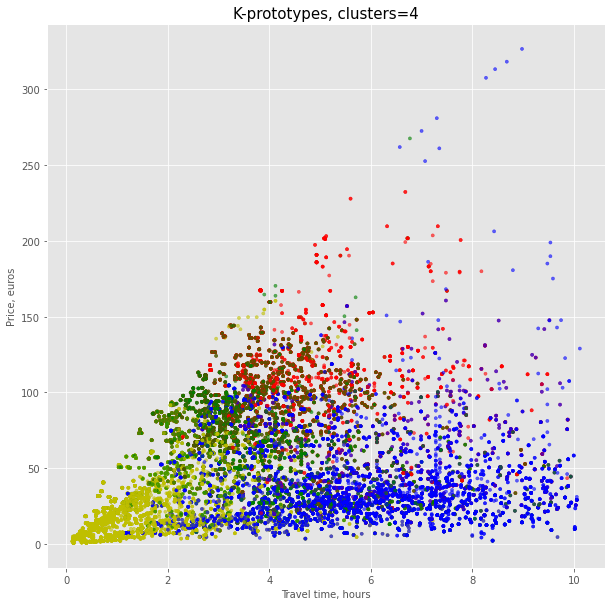

In [ ]:
#plot 4 groups
plt.figure(figsize=(10, 10))
plt.scatter(df4.totaltraveltimeinhours, df4.totalprice, c=df4.c, alpha = 0.6, s=10)

plt.xlabel("Travel time, hours", size = 10)
plt.ylabel("Price, euros", size = 10)
plt.title("K-prototypes, clusters=4", size = 15)

Can conclude that the clusters were defined, the data got clustered in the distinguishable way even without PCA after clustering for plotting,
Just plotted per two main dimensions price and travel time

yellow short and cheap, red-expensive trips, blue- with the highest travel time

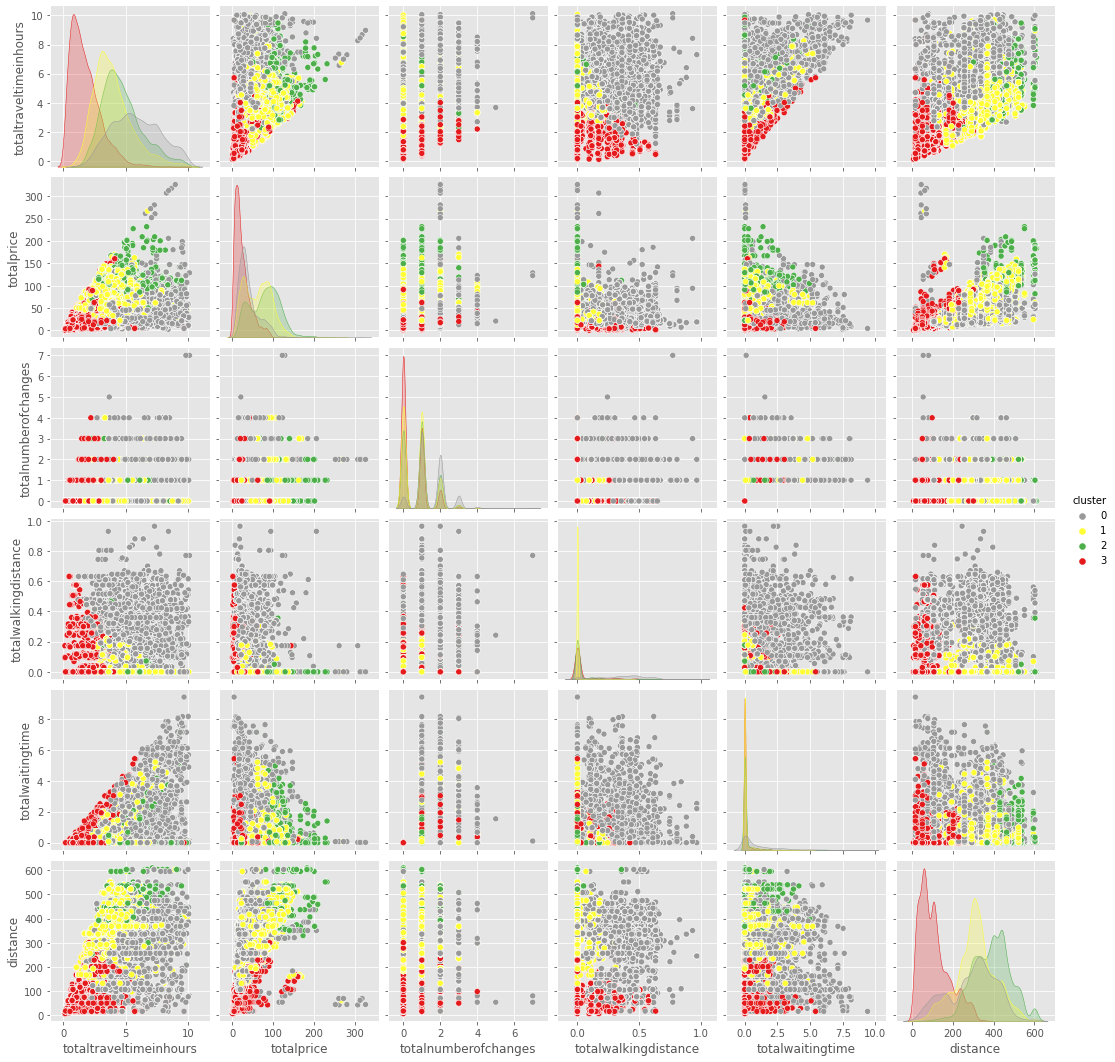

In [ ]:
#use pairplot for further investigation

sns.pairplot(df4,vars=['totaltraveltimeinhours','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime', 'distance'],hue='cluster', palette ='Set1_r')

Again define and descibe the clusters with respect to column distance horizontal axis-travel timeinhours-vertical

4th cluster(red) with the lowest distance between OD
3d cluster(green) with the highets distance between OD

In [ ]:
#investigate the 4th group (3 in clustering index)
#subset the data
fourth = df4[df4["cluster"] == 3]
fourth

totaltraveltimeinhours  totalprice  ...  cluster  c
2                        0.13        2.17  ...        3  y
3                        0.39        0.86  ...        3  y
6                        0.13        2.89  ...        3  y
7                        0.13        2.17  ...        3  y
8                        0.39        0.86  ...        3  y
...                       ...         ...  ...      ... ..
85103                    2.02       22.42  ...        3  y
85104                    2.02       19.62  ...        3  y
85105                    2.50       18.25  ...        3  y
85106                    3.03       17.64  ...        3  y
85108                    2.40       12.66  ...        3  y

[7634 rows x 13 columns]

In [ ]:
#investigate 4th group

for col in fourth:
    print(fourth[col].unique())
    print(fourth[col].nunique())

[0.13 0.39 0.25 0.95 1.13 1.93 2.95 1.55 2.55 1.06 0.3  0.81 0.37 0.43
 0.53 0.69 6.32 2.5  1.23 1.2  1.1  1.17 1.48 2.08 2.18 2.83 5.34 6.98
 1.27 5.57 3.17 3.   1.53 2.02 2.8  3.05 3.07 3.74 2.74 0.61 0.76 0.98
 1.41 6.66 5.66 2.77 3.68 1.78 4.75 1.82 1.8  7.03 4.83 2.11 1.18 2.37
 3.14 3.94 2.24 0.23 1.21 0.67 0.73 0.86 1.75 3.97 3.39 1.99 2.7  5.55
 4.64 2.4  2.48 4.12 4.55 5.03 5.39 6.7  3.72 0.48 0.83 0.52 0.5  0.32
 0.89 8.4  0.88 3.32 1.46 6.33 4.71 1.05 1.03 2.53 3.33 2.46 2.21 1.3
 1.71 3.18 3.58 1.37 1.35 2.96 3.63 2.26 2.28 2.22 2.17 2.68 2.75 3.62
 2.43 2.25 2.   1.84 2.54 1.5  2.29 3.21 2.07 1.92 2.3  3.93 3.4  2.73
 3.12 4.73 6.06 4.77 2.39 1.97 2.2  2.58 2.6  3.15 3.6  4.01 0.15 0.4
 0.56 0.18 0.17 1.89 5.73 3.47 3.95 4.81 0.68 1.02 0.55 1.26 0.93 2.03
 2.1  2.38 2.93 3.52 4.25 1.25 1.7  1.32 1.45 0.6  2.31 1.56 1.22 1.39
 3.23 3.22 1.57 2.67 2.23 2.13 2.62 3.13 3.44 3.75 3.78 1.07 5.   1.85
 1.58 1.43 1.47 4.92 3.43 0.58 4.34 1.9  2.42 2.82 1.38 1.67 1.83 2.71
 2.04 2.

Up to 4 changes are involved,all finiteautomationmodes,all considered preferences,23 from 33 labels, basically all OD pairs

In [ ]:
df5=df4.copy()#new df for the list

In [ ]:
df5['cluster'] = list(clusters) #obtain the clusters for the copy


In [ ]:
#arrange the separate pieces of datasets for further plotting
cluster_2= df5[df5['cluster']== 1]
cluster_2.head(50) #get the results

totaltraveltimeinhours  totalprice  ...  cluster  c
138                    3.95       91.02  ...        1  g
139                    3.65       91.02  ...        1  g
142                    3.18       96.41  ...        1  g
143                    3.18       91.63  ...        1  g
144                    3.48       91.13  ...        1  g
145                    3.98       27.43  ...        1  g
146                    5.57       22.47  ...        1  g
149                    3.95       91.02  ...        1  g
150                    3.65       91.02  ...        1  g
153                    3.18       96.41  ...        1  g
154                    3.18       91.63  ...        1  g
155                    3.48       91.13  ...        1  g
156                    3.98       27.43  ...        1  g
157                    5.57       22.47  ...        1  g
166                    3.53       93.60  ...        1  g
167                    3.18       96.41  ...        1  g
168                    5.57       22.47  ...        1  g
175                    5.57       22.47  ...        1  g
176                    3.98       29.41  ...        1  g
177                    3.18       96.41  ...        1  g
186                    3.53       93.60  ...        1  g
187                    3.18       96.41  ...        1  g
188                    5.57       22.47  ...        1  g
236                    3.53       93.60  ...        1  g
311                    3.53       93.60  ...        1  g
363                    1.13       27.81  ...        1  g
364                    0.95       28.21  ...        1  g
365                    2.95       26.05  ...        1  g
792                    2.70       77.06  ...        1  g
793                    2.80       74.33  ...        1  g
797                    3.80       41.98  ...        1  g
800                    7.80       41.98  ...        1  g
806                    2.02       81.91  ...        1  g
808                    1.93       81.91  ...        1  g
809                    2.70       77.06  ...        1  g
810                    2.80       74.33  ...        1  g
811                    2.80       46.03  ...        1  g
812                    3.05       42.95  ...        1  g
813                    3.07       42.60  ...        1  g
814                    3.80       41.98  ...        1  g
815                    9.46       34.68  ...        1  g
833                    3.11       83.47  ...        1  g
834                    2.02       81.91  ...        1  g
835                    1.93       81.91  ...        1  g
837                    3.16       59.91  ...        1  g
839                    5.87       42.60  ...        1  g
860                    2.02       81.91  ...        1  g
861                    1.93       81.91  ...        1  g
863                    3.16       59.91  ...        1  g
864                    8.88       46.03  ...        1  g

[50 rows x 13 columns]

In [ ]:
#again check the results for 1 cluster
cluster_1= df5[df5['cluster']== 0]
cluster_1.head(50) #get the results

totaltraveltimeinhours  totalprice  ...  cluster  c
200                     3.18       96.41  ...        0  b
208                     3.63       96.39  ...        0  b
220                     3.18       96.41  ...        0  b
222                     5.57       27.43  ...        0  b
223                     5.57       22.47  ...        0  b
237                     3.18       96.41  ...        0  b
240                     5.57       22.47  ...        0  b
254                     3.18       96.41  ...        0  b
259                     5.57       22.47  ...        0  b
264                     3.63       96.39  ...        0  b
274                     7.77       96.05  ...        0  b
280                     3.18       96.41  ...        0  b
284                     5.57       27.43  ...        0  b
289                     5.57       22.47  ...        0  b
290                     3.98       29.41  ...        0  b
295                     7.77       96.05  ...        0  b
298                     5.57       60.70  ...        0  b
312                     3.18       96.41  ...        0  b
317                     5.57       22.47  ...        0  b
690                     5.34       16.39  ...        0  b
691                     6.32       16.39  ...        0  b
694                     5.67       19.20  ...        0  b
723                     6.98       23.27  ...        0  b
733                     4.50       18.15  ...        0  b
736                     5.57       29.52  ...        0  b
744                     6.32       16.39  ...        0  b
747                     5.67       19.20  ...        0  b
755                     5.34       16.39  ...        0  b
798                     9.46       34.68  ...        0  b
867                     9.46       34.68  ...        0  b
920                     3.16       59.91  ...        0  b
931                     9.46       34.68  ...        0  b
954                     3.16       59.91  ...        0  b
965                     9.46       34.68  ...        0  b
990                     3.16       59.91  ...        0  b
1001                    9.46       34.68  ...        0  b
1028                    3.16       59.91  ...        0  b
1045                    9.46       34.68  ...        0  b
1070                    3.16       59.91  ...        0  b
1087                    9.46       34.68  ...        0  b
1115                    3.16       59.91  ...        0  b
1132                    9.46       34.68  ...        0  b
1272                    3.74        6.08  ...        0  b
1286                    3.68        7.55  ...        0  b
1295                    6.66        6.08  ...        0  b
1316                    3.68        7.55  ...        0  b
1317                    5.66        6.08  ...        0  b
1330                    6.66        6.08  ...        0  b
1346                    3.68        7.55  ...        0  b
1347                    5.66        6.08  ...        0  b

[50 rows x 13 columns]

In [ ]:
#the results for 3 cluster
cluster_3= df5[df5['cluster']== 2]
cluster_3.head(50) #get the results

totaltraveltimeinhours  totalprice  ...  cluster  c
127                     3.95       91.02  ...        2  r
128                     3.65       91.02  ...        2  r
131                     3.18       96.41  ...        2  r
132                     3.18       91.63  ...        2  r
133                     3.48       91.13  ...        2  r
134                     3.98       27.43  ...        2  r
135                     5.57       22.47  ...        2  r
199                     3.53       93.60  ...        2  r
203                     5.57       22.47  ...        2  r
225                     7.77       96.05  ...        2  r
253                     3.53       93.60  ...        2  r
766                     7.80       41.98  ...        2  r
772                     2.02       81.91  ...        2  r
774                     1.93       81.91  ...        2  r
775                     2.70       77.06  ...        2  r
776                     2.80       74.33  ...        2  r
777                     2.80       46.03  ...        2  r
778                     3.05       42.95  ...        2  r
779                     3.07       42.60  ...        2  r
780                     3.80       41.98  ...        2  r
781                     9.46       34.68  ...        2  r
783                     7.80       41.98  ...        2  r
838                     8.88       46.03  ...        2  r
840                     7.80       41.98  ...        2  r
841                     9.46       34.68  ...        2  r
916                     3.11       83.47  ...        2  r
917                     2.02       81.91  ...        2  r
918                     1.93       81.91  ...        2  r
926                     4.15       74.33  ...        2  r
928                     8.88       46.03  ...        2  r
929                     5.87       42.60  ...        2  r
930                     7.80       41.98  ...        2  r
960                     4.15       74.33  ...        2  r
962                     8.88       46.03  ...        2  r
963                     5.87       42.60  ...        2  r
964                     7.80       41.98  ...        2  r
998                     8.88       46.03  ...        2  r
1000                    7.80       41.98  ...        2  r
1024                    3.11       83.47  ...        2  r
1025                    2.02       81.91  ...        2  r
1026                    1.93       81.91  ...        2  r
1034                    4.15       74.33  ...        2  r
1037                    4.32       42.60  ...        2  r
1043                    3.80       41.98  ...        2  r
1361                    7.03       26.00  ...        2  r
1421                    7.03       26.00  ...        2  r
1506                    3.14       45.87  ...        2  r
1507                    3.94       18.44  ...        2  r
1556                    2.94       68.72  ...        2  r
1586                    2.94       68.72  ...        2  r

[50 rows x 13 columns]

In [ ]:
# the results for 4 cluster
cluster_4= df5[df5['cluster']== 3]
cluster_4.head(50) #get the results

totaltraveltimeinhours  totalprice  ...  cluster  c
2                      0.13        2.17  ...        3  y
3                      0.39        0.86  ...        3  y
6                      0.13        2.89  ...        3  y
7                      0.13        2.17  ...        3  y
8                      0.39        0.86  ...        3  y
11                     0.13        2.89  ...        3  y
12                     0.13        2.17  ...        3  y
13                     0.39        0.86  ...        3  y
18                     0.25        3.83  ...        3  y
20                     0.13        2.89  ...        3  y
21                     0.13        2.17  ...        3  y
22                     0.39        0.86  ...        3  y
28                     0.13        2.89  ...        3  y
29                     0.13        2.17  ...        3  y
30                     0.39        0.86  ...        3  y
36                     0.25        3.83  ...        3  y
37                     0.13        2.89  ...        3  y
38                     0.13        2.17  ...        3  y
39                     0.39        0.86  ...        3  y
47                     0.25        3.83  ...        3  y
48                     0.13        2.89  ...        3  y
51                     0.13        2.17  ...        3  y
52                     0.39        0.86  ...        3  y
59                     0.13        2.89  ...        3  y
62                     0.13        2.17  ...        3  y
63                     0.39        0.86  ...        3  y
71                     0.25        3.83  ...        3  y
72                     0.13        2.89  ...        3  y
75                     0.13        2.17  ...        3  y
76                     0.39        0.86  ...        3  y
86                     0.25        3.83  ...        3  y
87                     0.13        2.89  ...        3  y
92                     0.13        2.17  ...        3  y
93                     0.39        0.86  ...        3  y
101                    0.13        2.89  ...        3  y
106                    0.13        2.17  ...        3  y
107                    0.39        0.86  ...        3  y
117                    0.25        3.83  ...        3  y
118                    0.13        2.89  ...        3  y
123                    0.13        2.17  ...        3  y
124                    0.39        0.86  ...        3  y
321                    0.95       28.21  ...        3  y
322                    1.13       27.81  ...        3  y
323                    1.93       26.05  ...        3  y
324                    2.95       26.05  ...        3  y
326                    1.55       28.21  ...        3  y
328                    0.95       28.21  ...        3  y
329                    1.93       26.05  ...        3  y
330                    2.95       26.05  ...        3  y
334                    0.95       28.21  ...        3  y

[50 rows x 13 columns]

Price is cheap and time is fast indeed

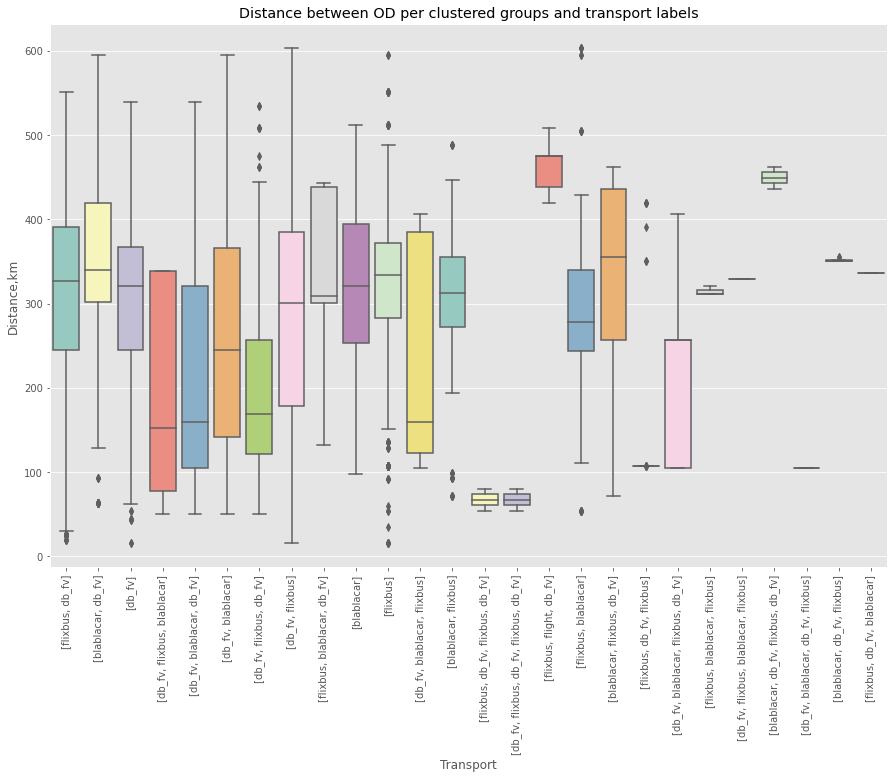

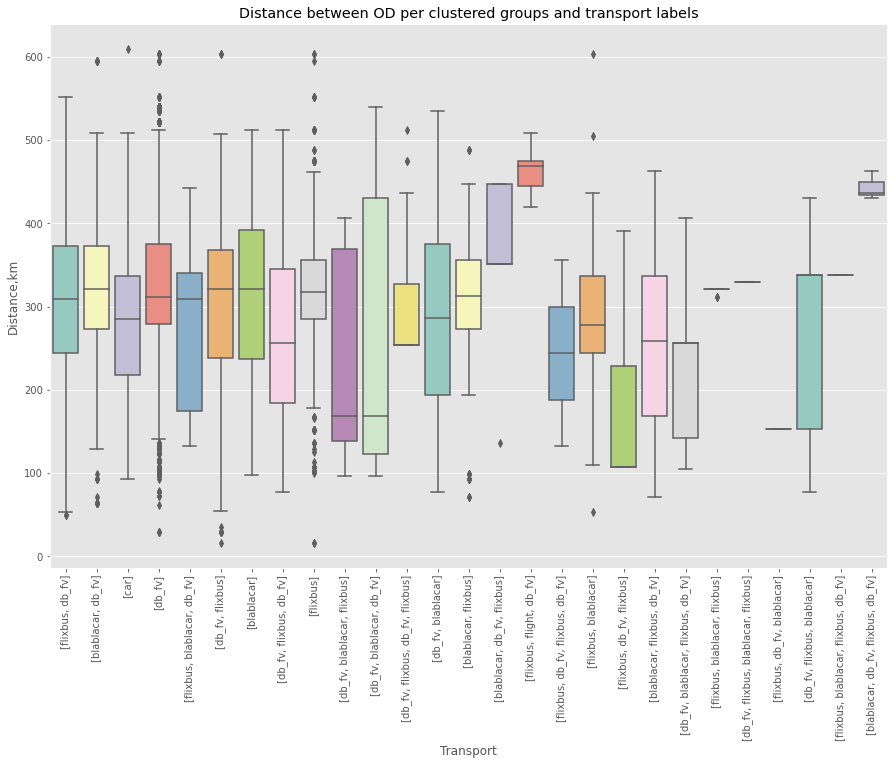

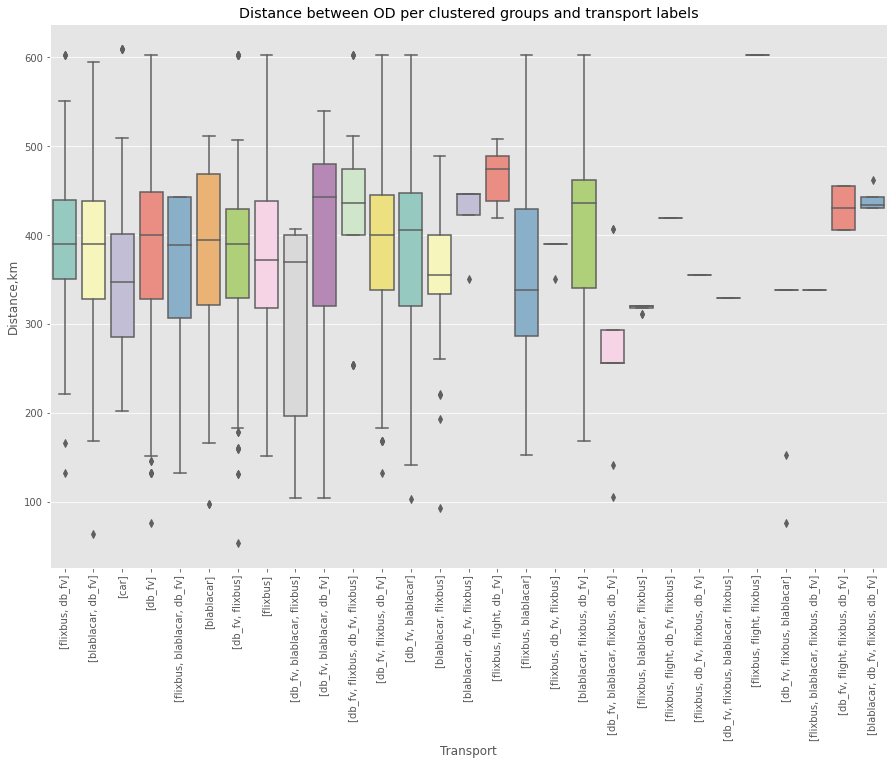

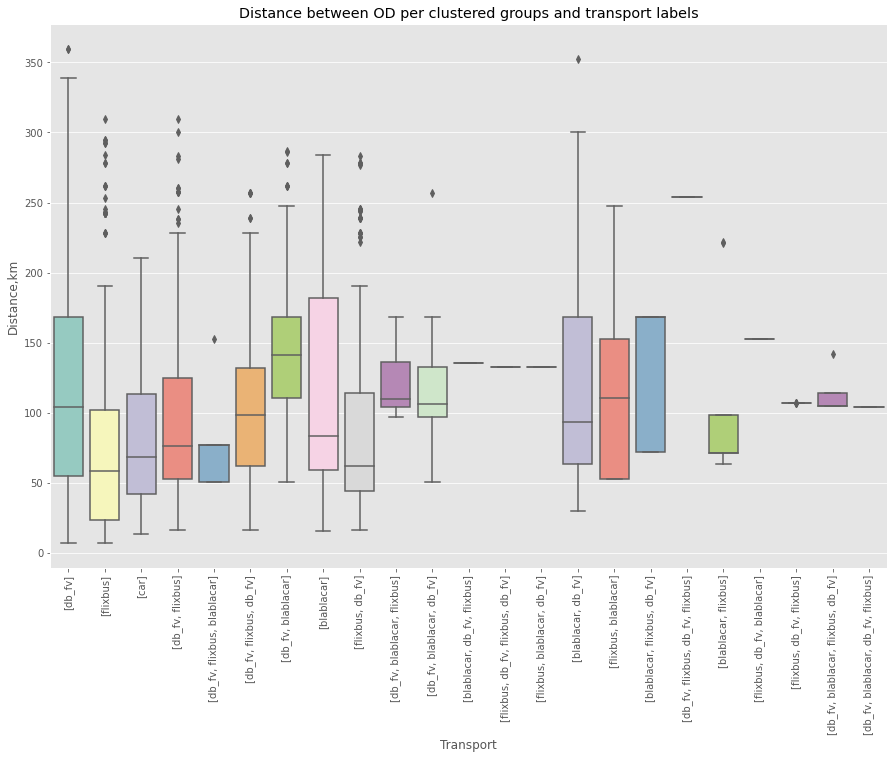

In [ ]:
#plot the data to reveal the mode types involved:

def plot0(datt): #function
  plt.figure(figsize=(15, 10))
  sns.boxplot(data=datt,x="finalsolutionusedlabels", y='distance',palette='Set3')#take care about variables of the data
  plt.title('Distance between OD per clustered groups and transport labels')
  plt.xticks(rotation='vertical')
  plt.xlabel('Transport')
  plt.ylabel("Distance,km")


plot0(cluster_1)
plot0(cluster_2)
plot0(cluster_3)
plot0(cluster_4)


4th group as we can see the least distance (up to 350 km instead of up to 600, no flights involved, but basically all other combinations we have)


In [ ]:
#check the min values for clusters
def minvalue(data):
  minvalue = data[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance']].min()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': ")
  print(minvalue)

minvalue(cluster_1)
minvalue(cluster_2)
minvalue(cluster_3)
minvalue(cluster_4)


minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours     1.170
totalwaitingtime           0.000
totalnumberofchanges       0.000
totalwalkingdistance       0.000
totalprice                 2.350
distance                  16.272
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours     0.620
totalwaitingtime           0.000
totalnumberofchanges       0.000
totalwalkingdistance       0.000
totalprice                 2.350
distance                  16.272
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours     1.430
totalwaitingtime           0.000
totalnumberofchanges       0.000
totalwalkingdistance       0.000
tota

3d cluster has the highest min distance between OD, 4th the lowest

In [ ]:
#investigate the group with respect to max value

def maxvalue(d):
  maxvalue = d[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance']].max()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice' & 'distance': ")
  print(maxvalue)

maxvalue(cluster_1)
maxvalue(cluster_2)
maxvalue(cluster_3)
maxvalue(cluster_4)


minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': 
totaltraveltimeinhours     10.120
totalwaitingtime            9.400
totalnumberofchanges        7.000
totalwalkingdistance        0.965
totalprice                326.420
distance                  603.018
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': 
totaltraveltimeinhours     10.060
totalwaitingtime            5.200
totalnumberofchanges        4.000
totalwalkingdistance        0.455
totalprice                267.420
distance                  609.816
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice': 
totaltraveltimeinhours     10.060
totalwaitingtime            7.130
totalnumberofchanges        4.000
totalwalkingdistance        0.632
totalprice              

Again distance and price for the 4th cluster, the range would be from 1 hour to 47 hours,0-36 waiting hours, 0-5 changes,0-0.745 walking distance, 0.72-50.840 for the price

In [ ]:
#investigate the group with respect to mean value

def meanvalue(dat):
  meanvalue = dat[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance']].mean()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': ")
  print(meanvalue)

meanvalue(cluster_1)
meanvalue(cluster_2)
meanvalue(cluster_3)
meanvalue(cluster_4)



minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      5.808185
totalwaitingtime            1.120493
totalnumberofchanges        1.462147
totalwalkingdistance        0.355217
totalprice                 40.059995
distance                  293.518752
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      3.921513
totalwaitingtime            0.097207
totalnumberofchanges        0.725291
totalwalkingdistance        0.005126
totalprice                 62.307406
distance                  310.932394
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      4.712417
totalwaitingtime            0.157893
totalnumberofc

Fully the same pattern as it was before in the table, basically the centroids again -but unscaled somehow

In [ ]:
#investigate the group with respect to median with sorted values in the middle

def medianvalue(dat):
  medianvalue = dat[['totaltraveltimeinhours', 'totalwaitingtime', 'totalnumberofchanges',	'totalwalkingdistance',	'totalprice', 'distance']].median()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': ")
  print(medianvalue)

medianvalue(cluster_1)
medianvalue(cluster_2)
medianvalue(cluster_3)
medianvalue(cluster_4)


minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      5.690
totalwaitingtime            0.390
totalnumberofchanges        1.000
totalwalkingdistance        0.374
totalprice                 32.360
distance                  312.059
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      3.670
totalwaitingtime            0.000
totalnumberofchanges        1.000
totalwalkingdistance        0.000
totalprice                 64.670
distance                  309.765
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance': 
totaltraveltimeinhours      4.430
totalwaitingtime            0.000
totalnumberofchanges        1.000
totalwalkingdistance  

Repeats the mean pattern, expensive-third- cheapest-fourth

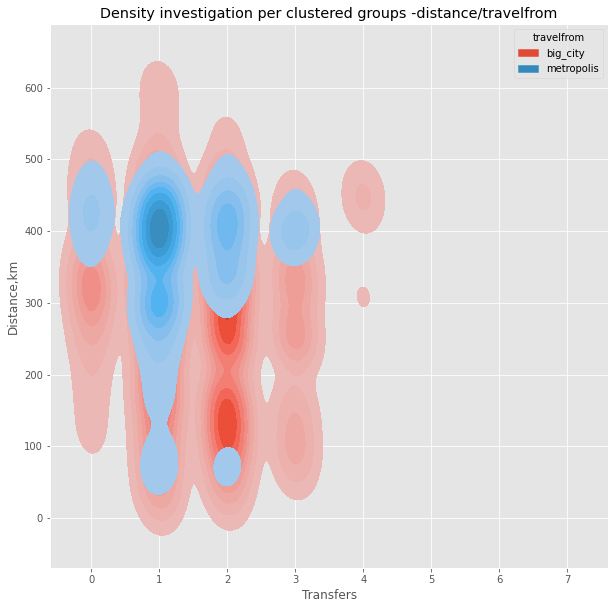

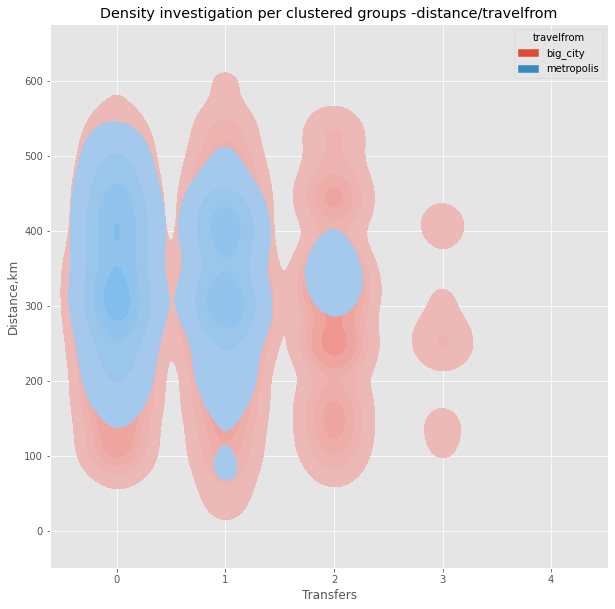

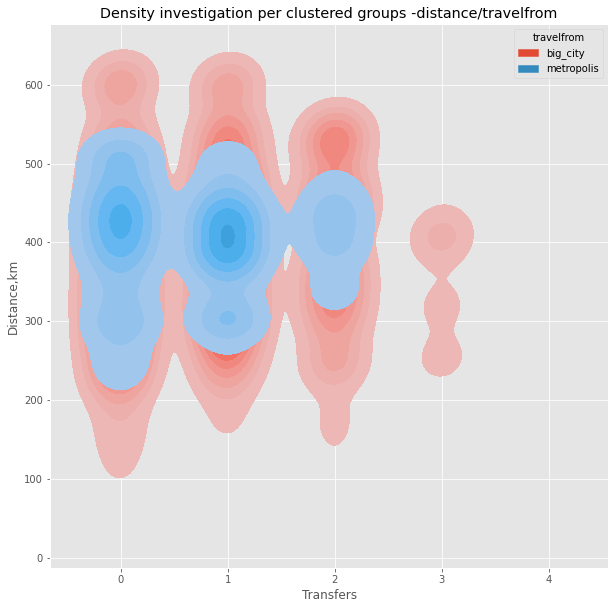

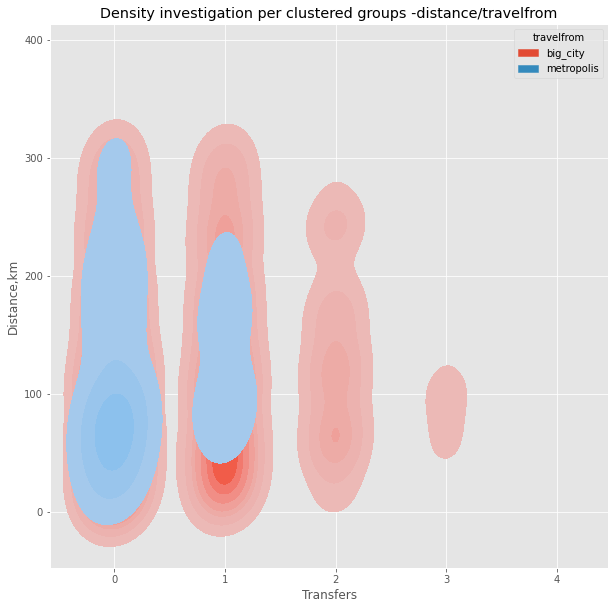

In [ ]:
#get a 2 dimensional kernel density estimation (estimate of probability density) of all clusters using number of changes and distance OD

def plot1(data):
  plt.figure(figsize=(10,10))#check the size
  sns.kdeplot(x=data.totalnumberofchanges,y=data.distance,hue=data.travelfrom,shade=True)
  plt.title('Density investigation per clustered groups -distance/travelfrom')
  plt.xlabel('Transfers')
  plt.ylabel("Distance,km")

plot1(cluster_1)
plot1(cluster_2)
plot1(cluster_3)
plot1(cluster_4)


for the 2d and 3d group we are also travelling a lot from metropolis, travelling from metropolis encompasses lower distance than from big city

departing from metropolis we have less number of changes for the routes

the cheapest group has  metropolis departure only for 0-1 transfers

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


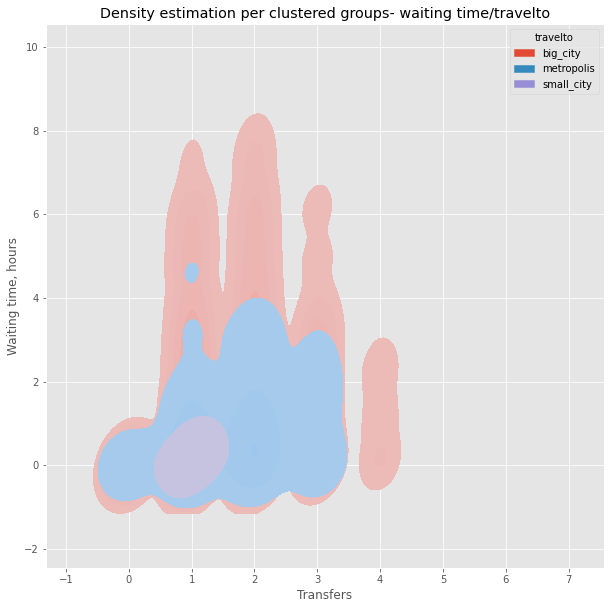

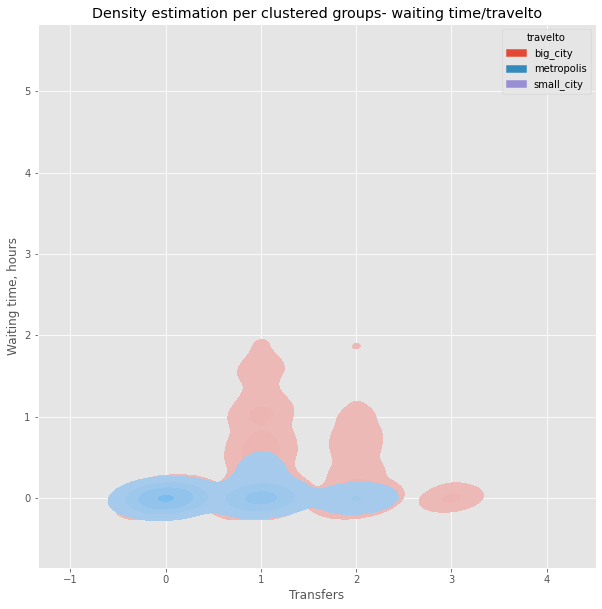

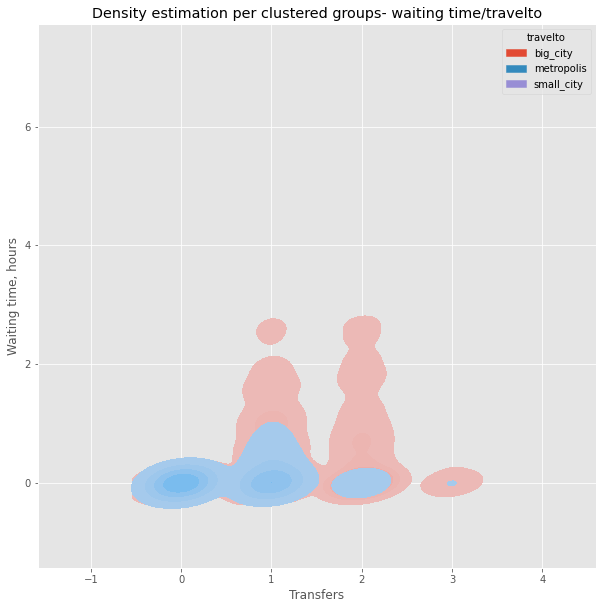

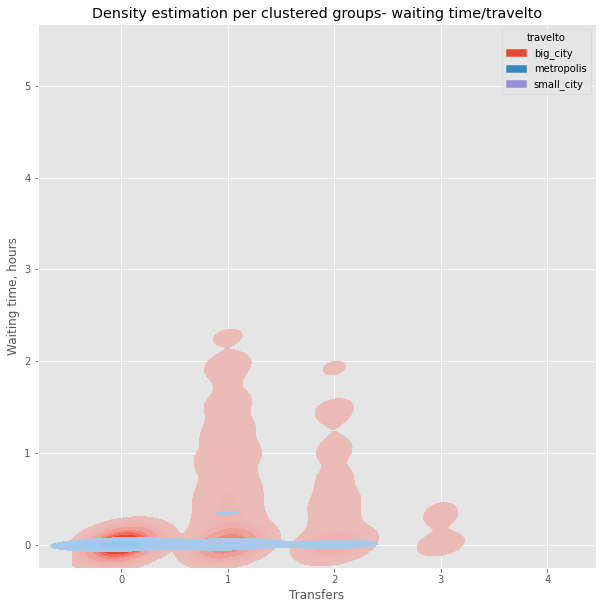

In [ ]:
#get a 2 dimensional kernel density estimation (estimate of probability density) of clusters using number of changes and waiting time since they have the degree of correlation

def plot2(data):
  plt.figure(figsize=(10,10))#check the size
  sns.kdeplot(x=data.totalnumberofchanges,y=data.totalwaitingtime,hue=data.travelto,shade=True)
  plt.title('Density estimation per clustered groups- waiting time/travelto')
  plt.xlabel('Transfers')
  plt.ylabel("Waiting time, hours")

plot2(cluster_1)
plot2(cluster_2)
plot2(cluster_3)
plot2(cluster_4)


1st non convenient cluster-with the highest waiting time when we travel to big city especially (when we travel to metropolis the waiting time is lower)

we travel to the small city only by non conveniete routes of 1st cluster with high travel,waiting time, we have 1 change

the cheapest group-travelling TO metropolis-normally waiting time is zero

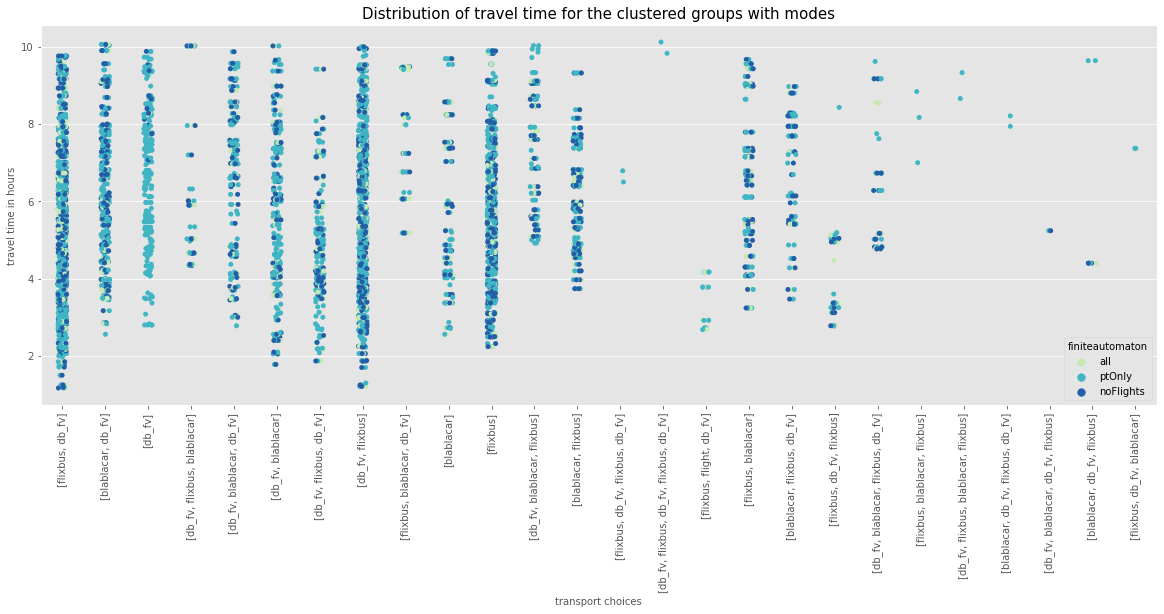

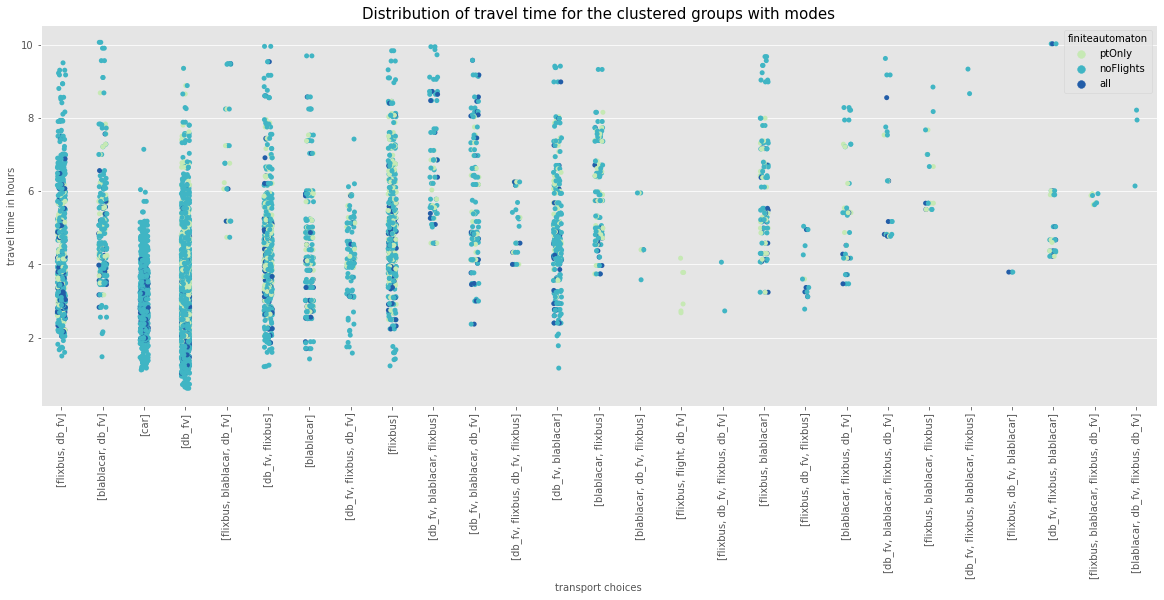

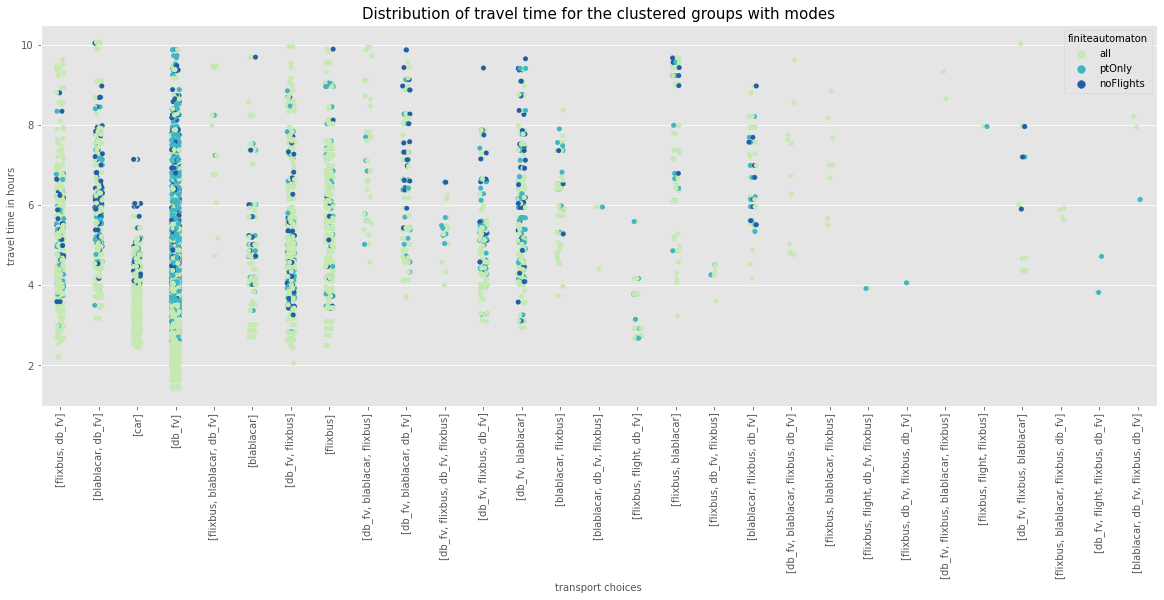

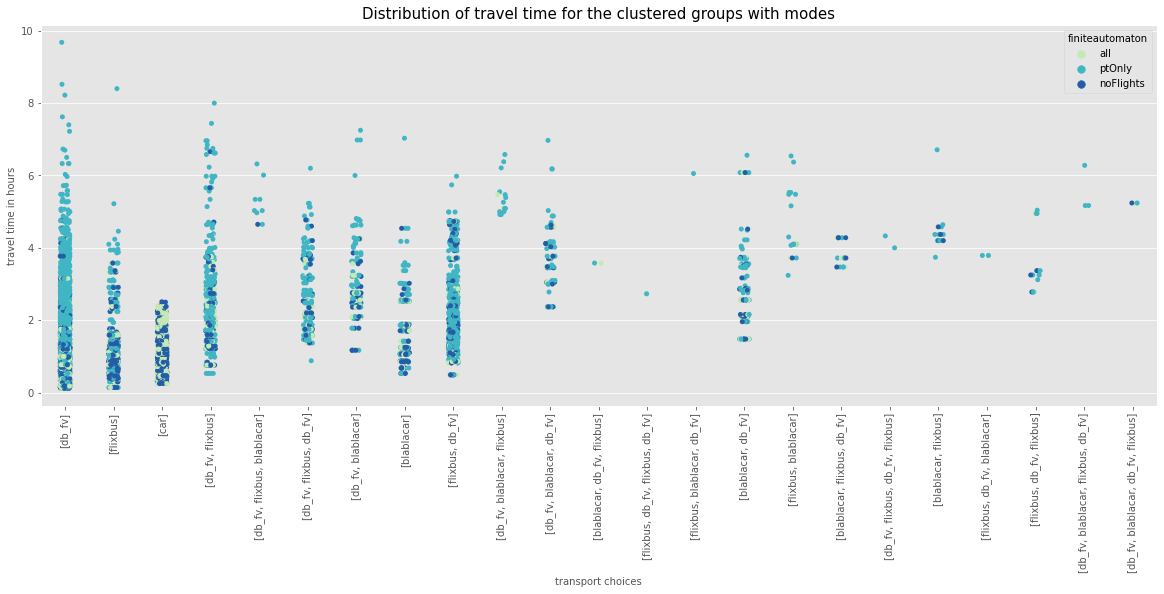

In [ ]:
#check the distribution of traveltime per mode

def plot3(data):
  plt.figure(figsize=(20, 7))

  sns.stripplot(x=data['finalsolutionusedlabels'],y=data['totaltraveltimeinhours'],hue=data['finiteautomaton'],palette='YlGnBu')#configure the axis
  plt.xlabel("transport choices", size = 10)
  plt.xticks(rotation='vertical')
  plt.ylabel("travel time in hours", size = 10)
  plt.title('Distribution of travel time for the clustered groups with modes',fontsize=15)

plot3(cluster_1)
plot3(cluster_2)
plot3(cluster_3)
plot3(cluster_4)
 

1st group-mostly public transport,
2d group clearly no Flights,
3d expensive group includes all ofthe transport, especially having train would increase the travel time,
4th group noflight mode in general returns faster travel time than publictransportmode => almost no all types of transport involved

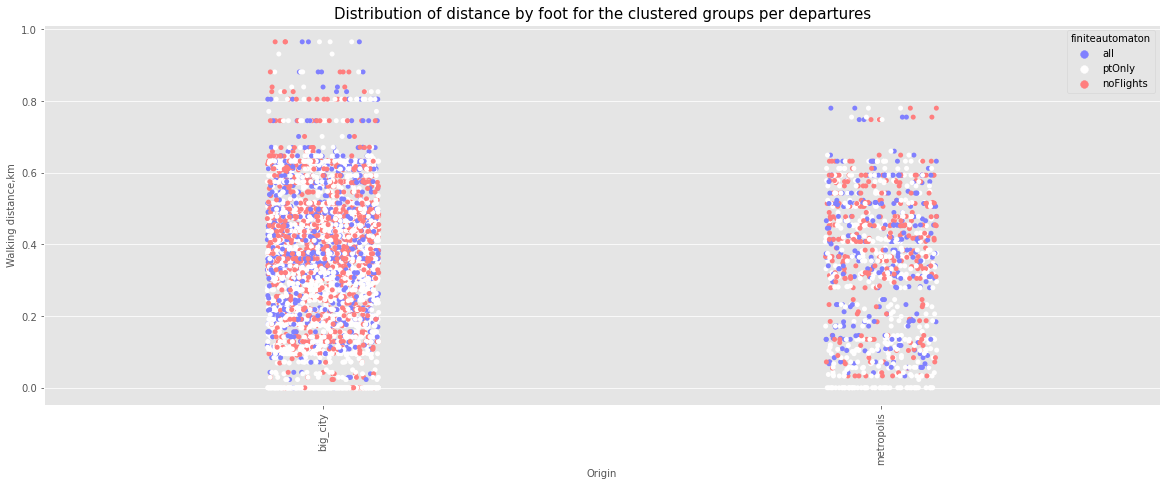

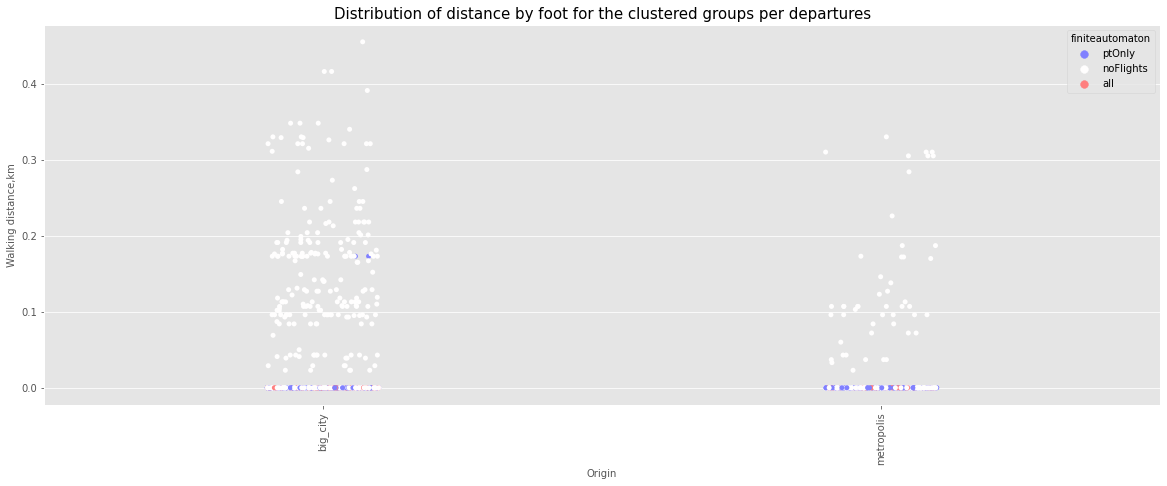

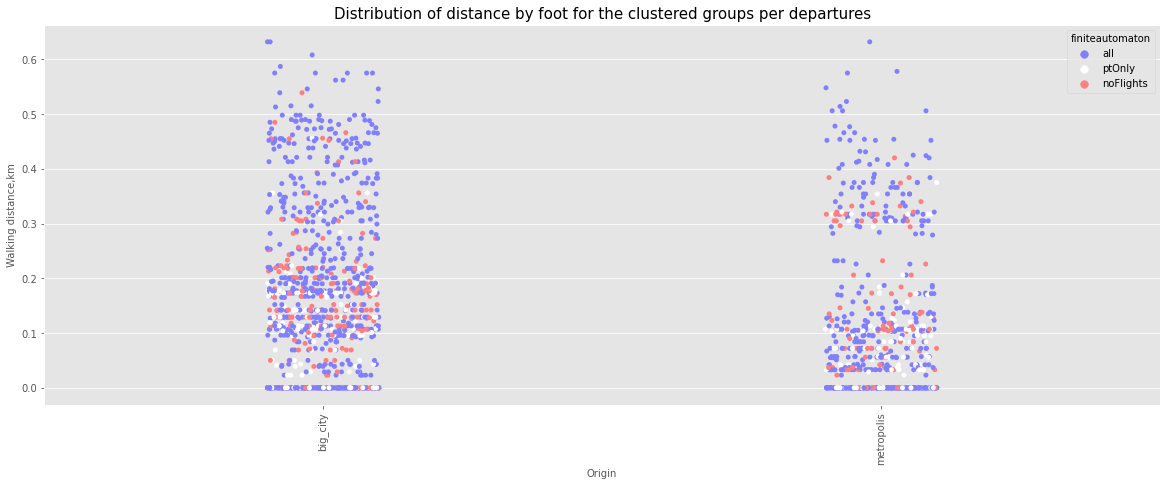

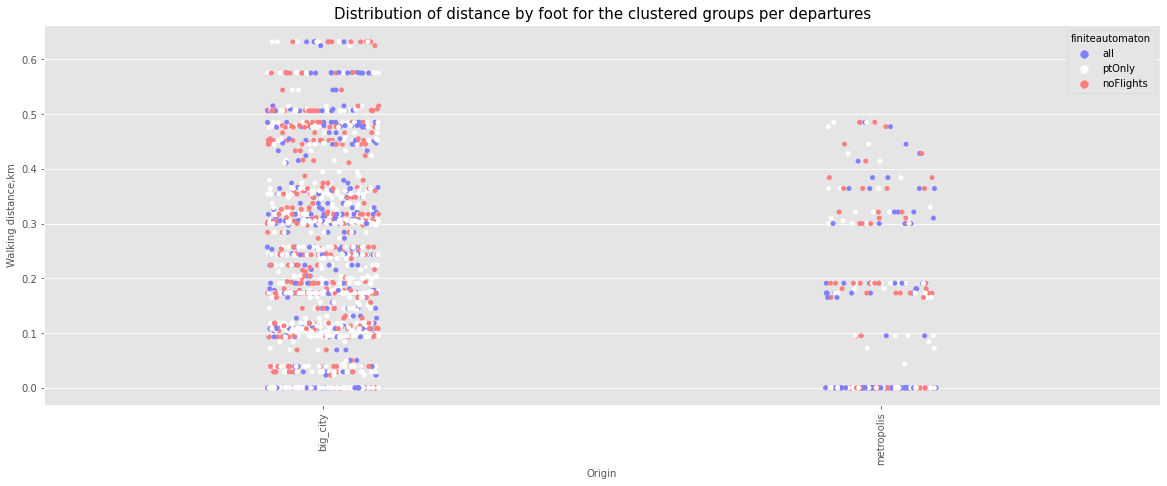

In [ ]:
#check the walking distance pattern per cities from where to travel

def plot4(data):
  plt.figure(figsize=(20, 7))

  sns.stripplot(x=data['travelfrom'],y=data['totalwalkingdistance'],hue=data['finiteautomaton'],palette='bwr')#configure the axis
  plt.xlabel("Origin", size = 10)
  plt.xticks(rotation='vertical')
  plt.ylabel("Walking distance,km", size = 10)
  plt.title('Distribution of distance by foot for the clustered groups per departures',fontsize=15)

plot4(cluster_1)
plot4(cluster_2)
plot4(cluster_3)
plot4(cluster_4)


2d group-less walks in comparison to other groups,with the mode noflights-walking distance still higher, travelling from bigcity the distance by foot to cover is greater,
1,2,4 groups- more walks travelling from big city then from metropolis
3d group same km to cover by foot from metropolis and bigcity-expensive group,
3d group-"all" transport modes gives the highest walking distance

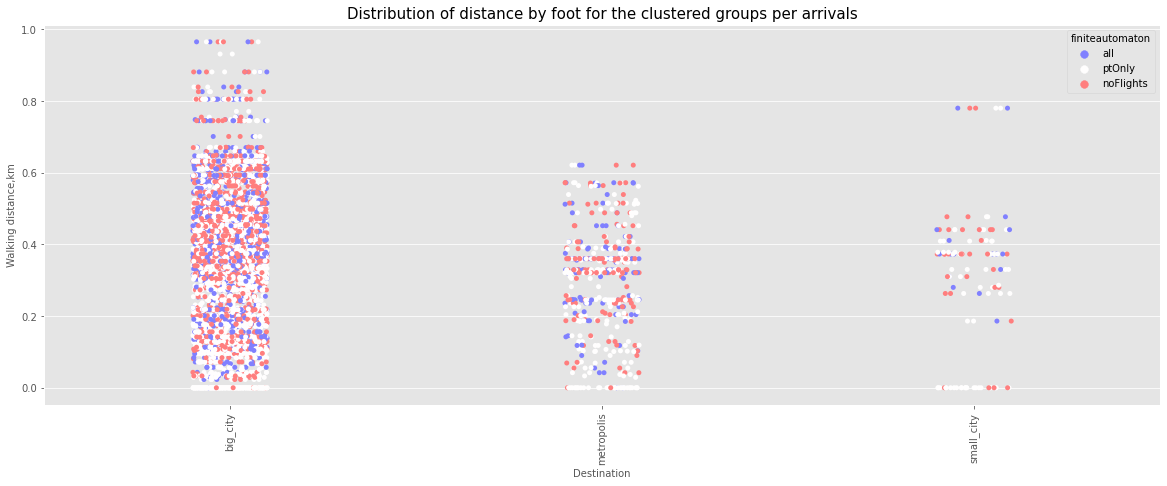

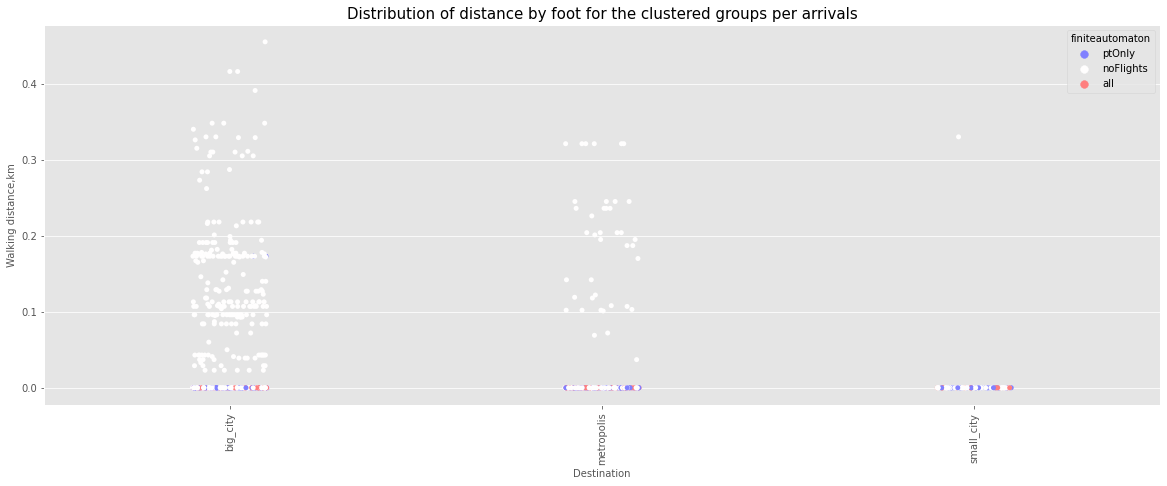

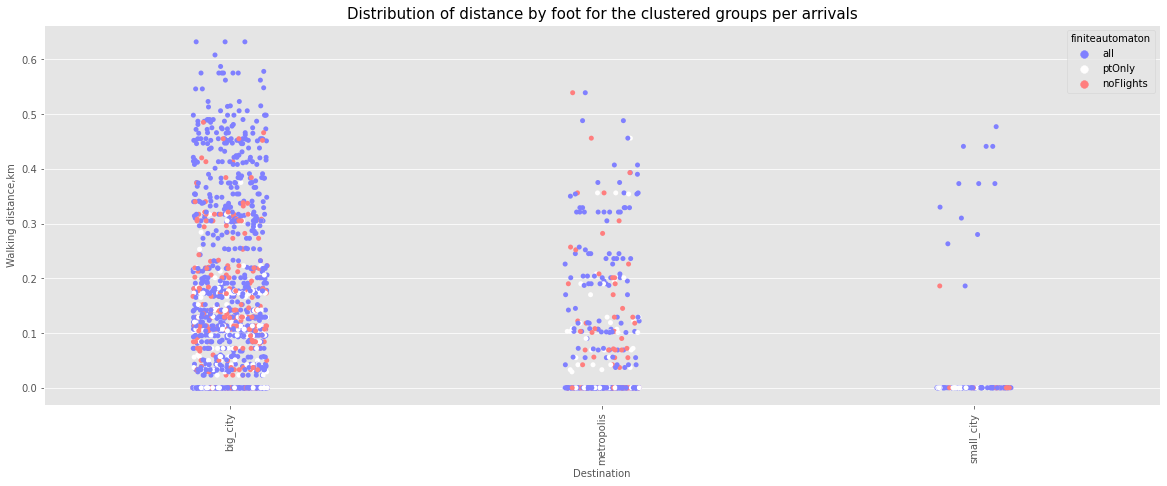

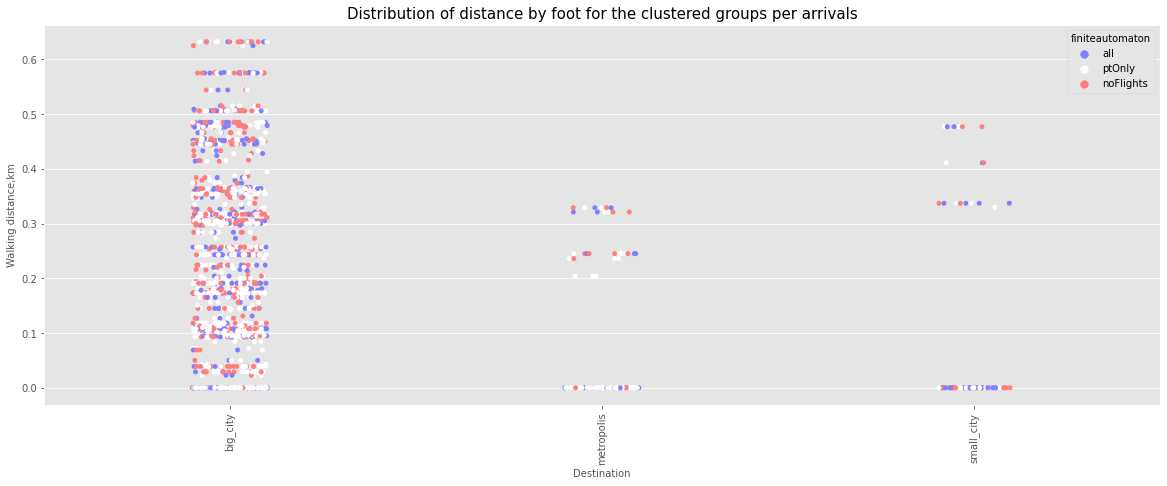

In [ ]:
#check the walking distance pattern per cities where we are going
#use stripplot
def plot41(data):
  plt.figure(figsize=(20, 7))

  sns.stripplot(x=data['travelto'],y=data['totalwalkingdistance'],hue=data['finiteautomaton'],palette='bwr')#configure the axis
  plt.xlabel("Destination", size = 10)
  plt.xticks(rotation='vertical')
  plt.ylabel("Walking distance,km", size = 10)
  plt.title('Distribution of distance by foot for the clustered groups per arrivals',fontsize=15)

plot41(cluster_1)
plot41(cluster_2)
plot41(cluster_3)
plot41(cluster_4)

we have a small city added,
travelling TO big city-the highest walking distance, to metropolis the lowest except 3d expensive group

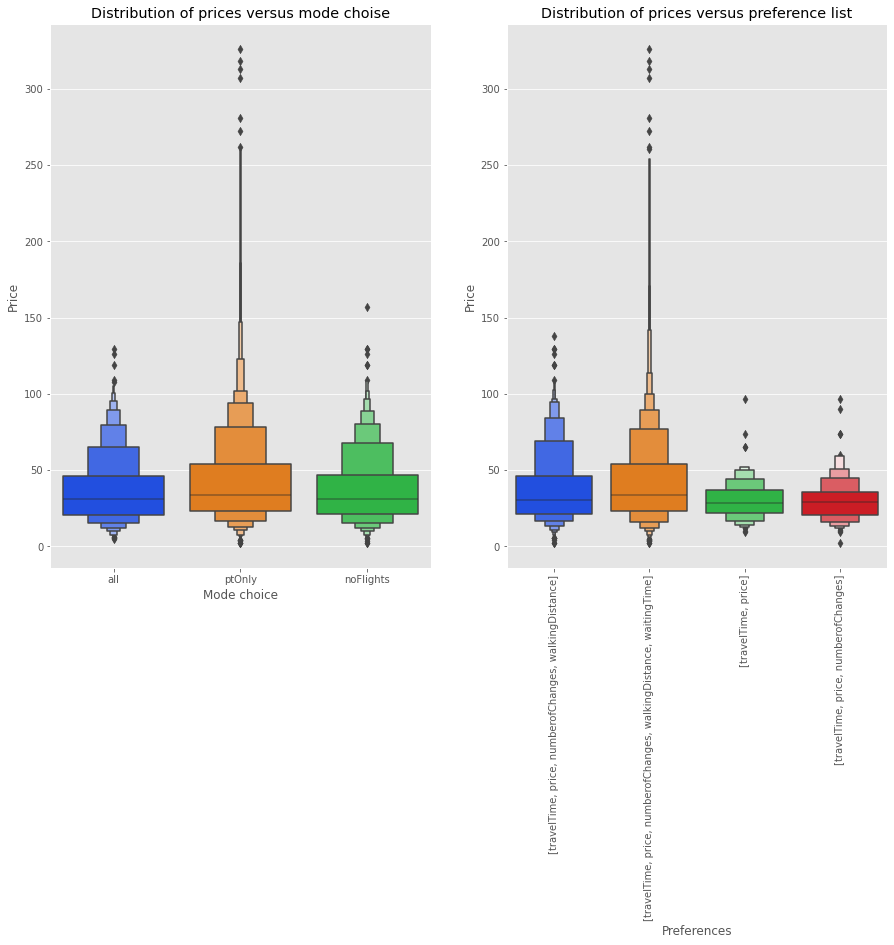

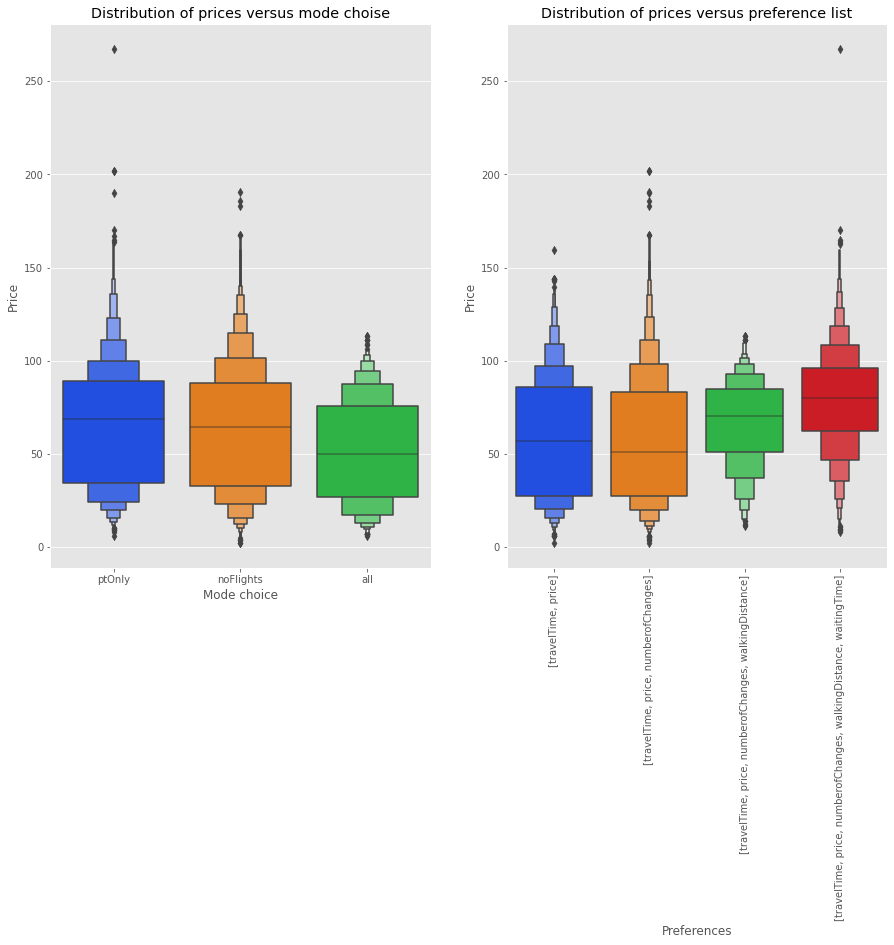

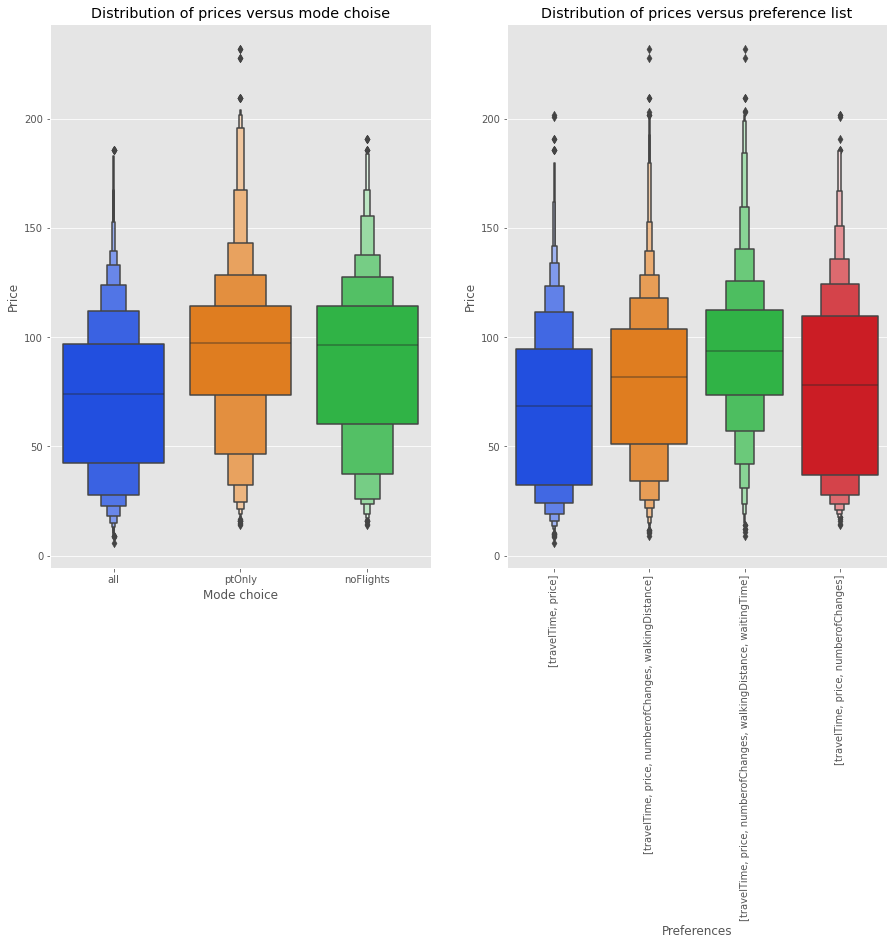

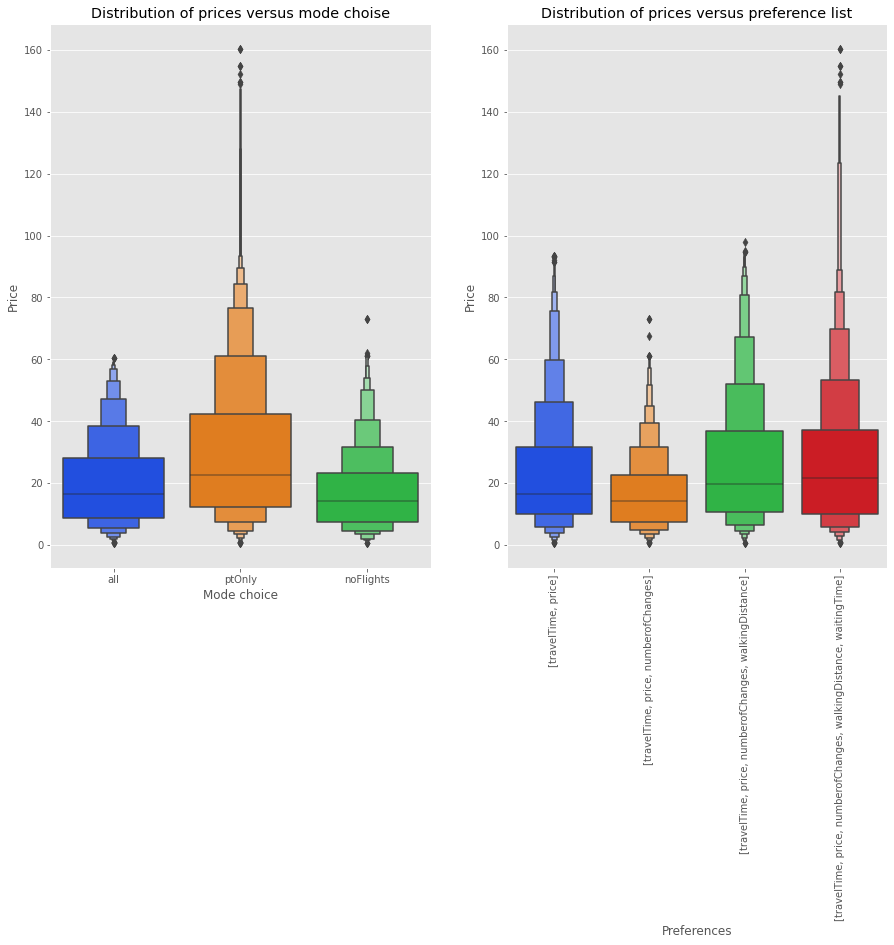

In [ ]:
#distribution of price per mode choice and preferences constraints
def plot5(dat):
  fig, axes = plt.subplots(1,2,figsize=(15,10))#unpack the tuple into the variables fig and axes

  plt.subplot(121)
  sns.boxenplot(data=dat, x='finiteautomaton',y='totalprice',palette='bright') #pick the inner parametres for plotting
  plt.title('Distribution of prices versus mode choise')
  plt.xlabel('Mode choice')
  plt.ylabel("Price")


  plt.subplot(122)
  sns.boxenplot(data=dat, x='consideredpreferences',y='totalprice',palette='bright')#pick the inner parametres for plotting
  plt.xticks(rotation='vertical')
  plt.title('Distribution of prices versus preference list')
  plt.xlabel('Preferences')
  plt.ylabel("Price")

plot5(cluster_1)
plot5(cluster_2)
plot5(cluster_3)
plot5(cluster_4)


Price is higher for pt only for all groups, and considering full number of constraints for all groups

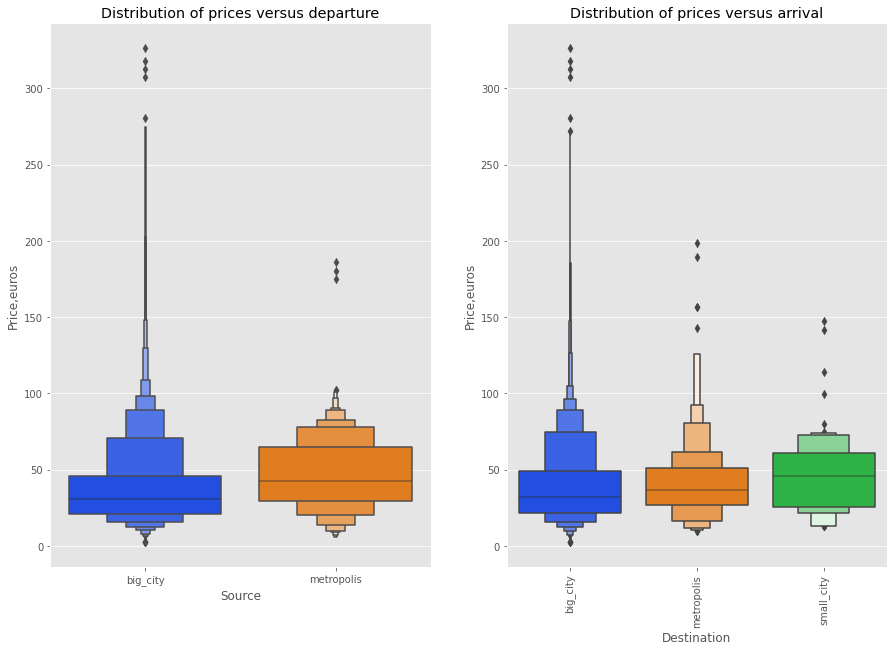

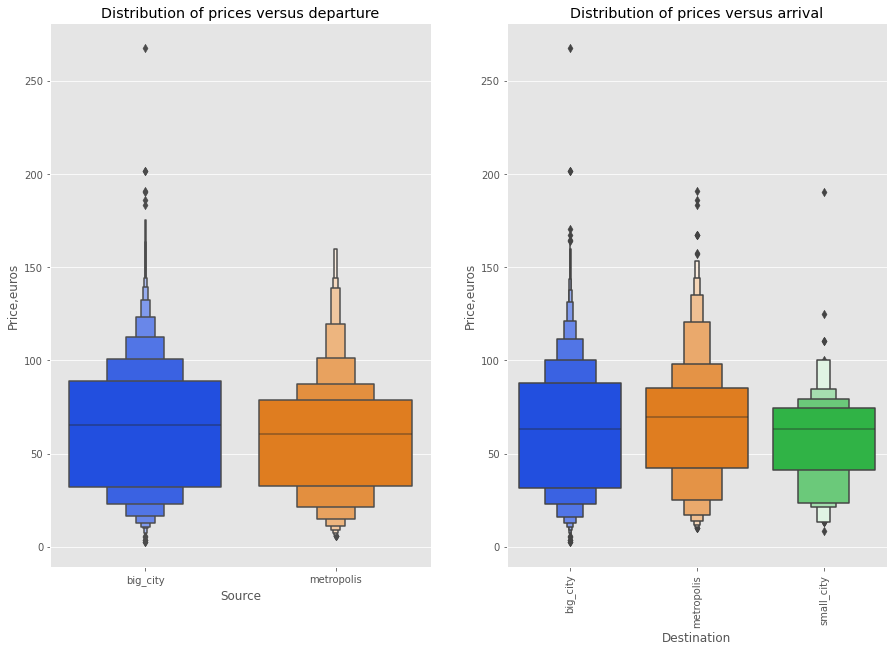

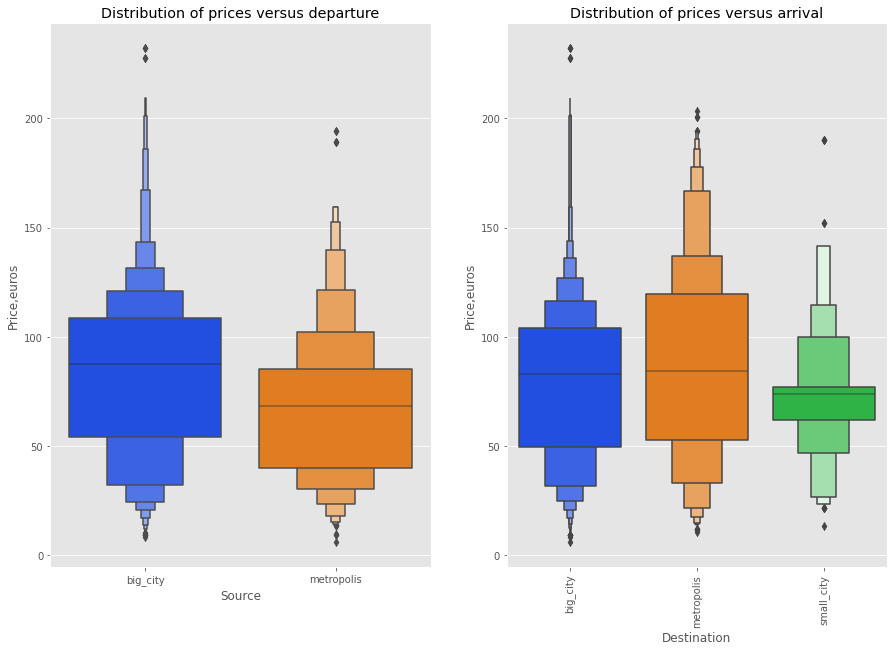

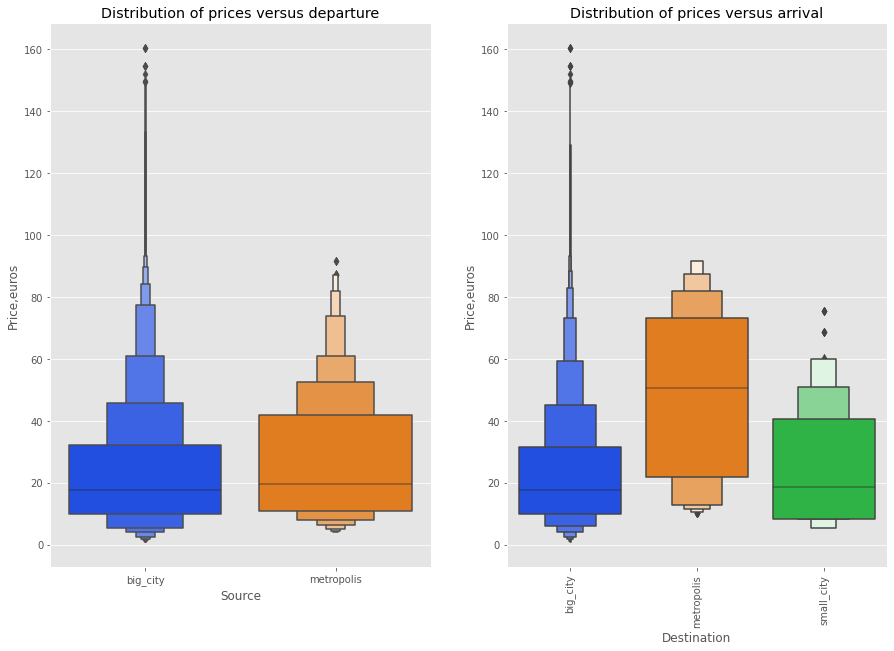

In [ ]:
#distribution of price travelling 'from' and 'to'
def plot51(dat):
  fig, axes = plt.subplots(1,2,figsize=(15,10))#unpack the tuple into the variables fig and axes

  plt.subplot(121)
  sns.boxenplot(data=dat, x='travelfrom',y='totalprice',palette='bright') #pick the inner parametres for plotting
  plt.title('Distribution of prices versus departure')
  plt.xlabel('Source')
  plt.ylabel("Price,euros")


  plt.subplot(122)
  sns.boxenplot(data=dat, x='travelto',y='totalprice',palette='bright')#pick the inner parametres for plotting
  plt.xticks(rotation='vertical')
  plt.title('Distribution of prices versus arrival')
  plt.xlabel('Destination')
  plt.ylabel("Price,euros")

plot51(cluster_1)
plot51(cluster_2)
plot51(cluster_3)
plot51(cluster_4)


For all groups more expensive to go from and arrive to big_city, to go to small city is the cheapest option

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


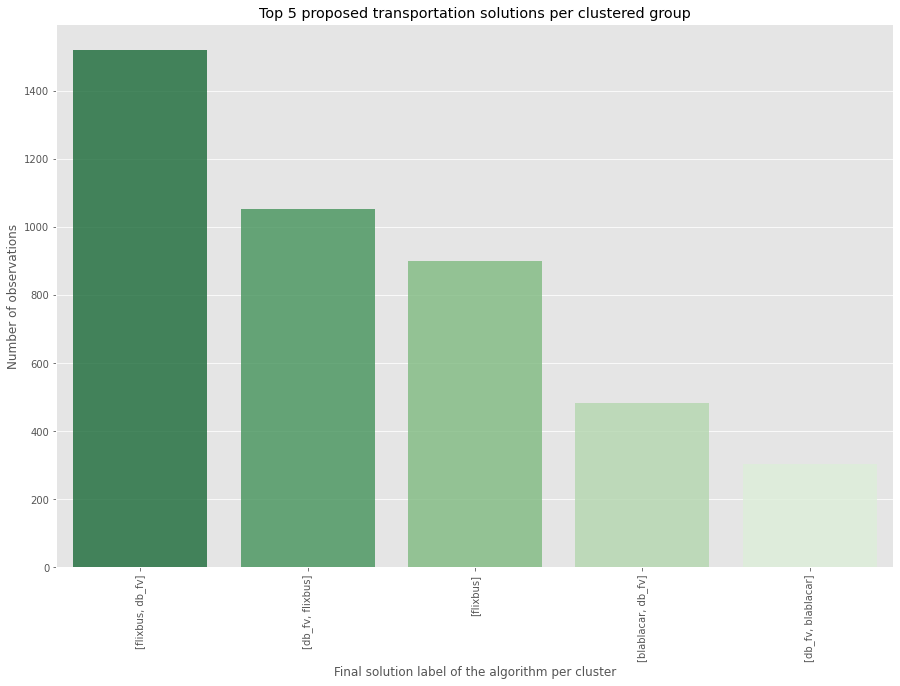

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


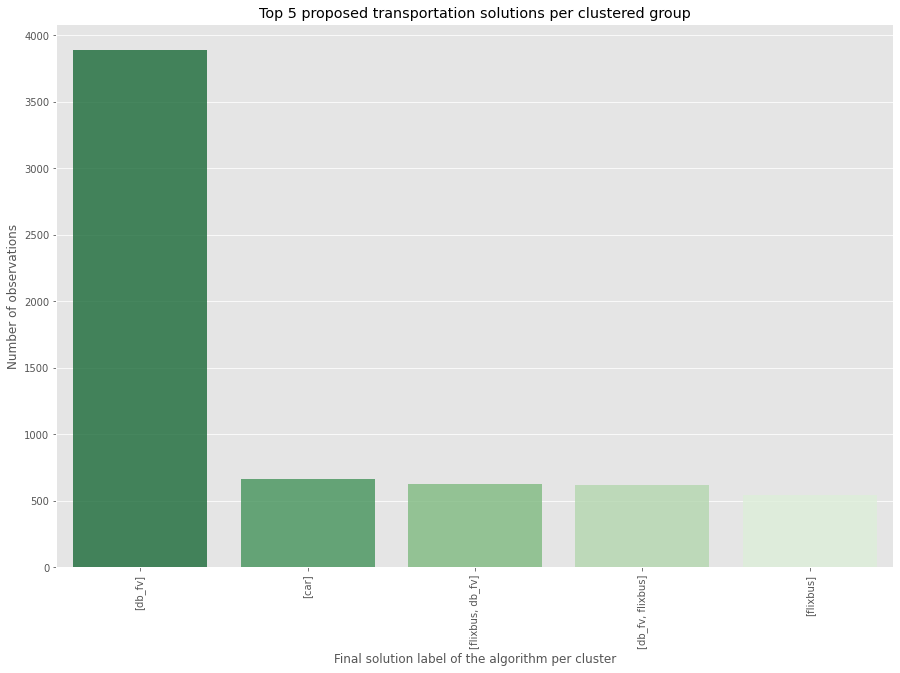

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


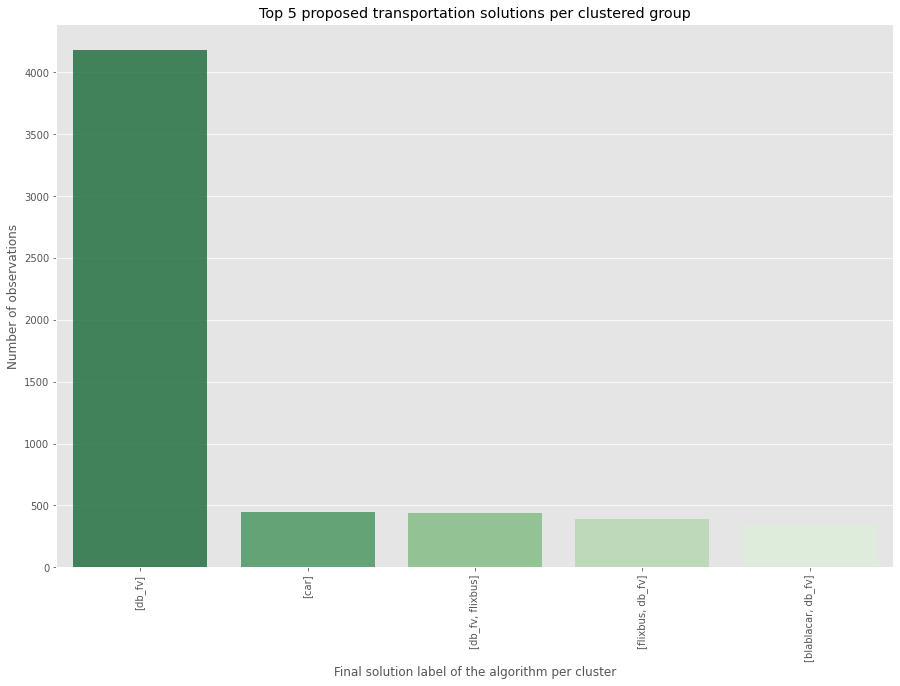

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


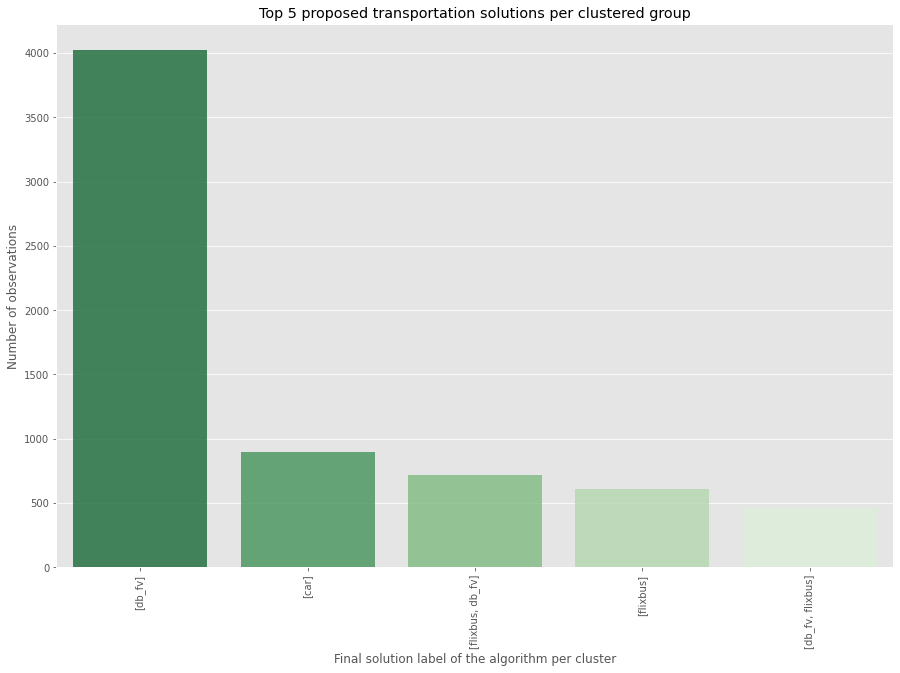

In [ ]:
def plot6(data):
# top proposed solutions

  cnt_srs = data['finalsolutionusedlabels'].value_counts().nlargest(5) #the largest 5
  plt.figure(figsize=(15,10))
  sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="Greens_r")
  plt.title('Top 5 proposed transportation solutions per clustered group')
  plt.xticks(rotation='vertical')
  plt.xlabel('Final solution label of the algorithm per cluster', fontsize=12)
  plt.ylabel('Number of observations', fontsize=12)
  plt.show()

plot6(cluster_1)
plot6(cluster_2)
plot6(cluster_3)
plot6(cluster_4)


Each group is train as a top leader following by a car,except first the slowest one (non-convenient)-here is a combination=train+flixbus and the discrepancies beween other following modes are not that dramatic, we do not have pure @train@ in the first group in top 5 at all, only inside the combination

In [ ]:
#setting the objects to category 
categ_data = clscaled.copy()
for i in categ_data.select_dtypes(include='object'):
    categ_data[i] = categ_data[i].astype('category')

In [ ]:
#get the labels
proto_labs = kproto.labels_

In [ ]:
#install a special library
pip install shap

     |████████████████████████████████| 564 kB 2.1 MB/s 


In [ ]:
#evaluation of our clusters- how were the groups?

from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score
#the subsample ratio of columns when constructing each tree
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, categ_data, proto_labs, scoring='f1_weighted')
print(f'Cross validation F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

Cross validation F1 score for K-Prototypes clusters is 0.9694075514484325


the model produced the F1 score which is close to 1, that means that clusters were raised are distinguishable, the F1-score is the harmonic mean of precision and recall, the highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, our value is 0,969

In [ ]:
clf_kp.fit(categ_data, proto_labs)#fitting

LGBMClassifier(colsample_by_tree=0.8)

In [ ]:
#explain which column influence on what group
explainer_kk = shap.TreeExplainer(clf_kp)
shap_values_kk = explainer_kk.shap_values(categ_data)

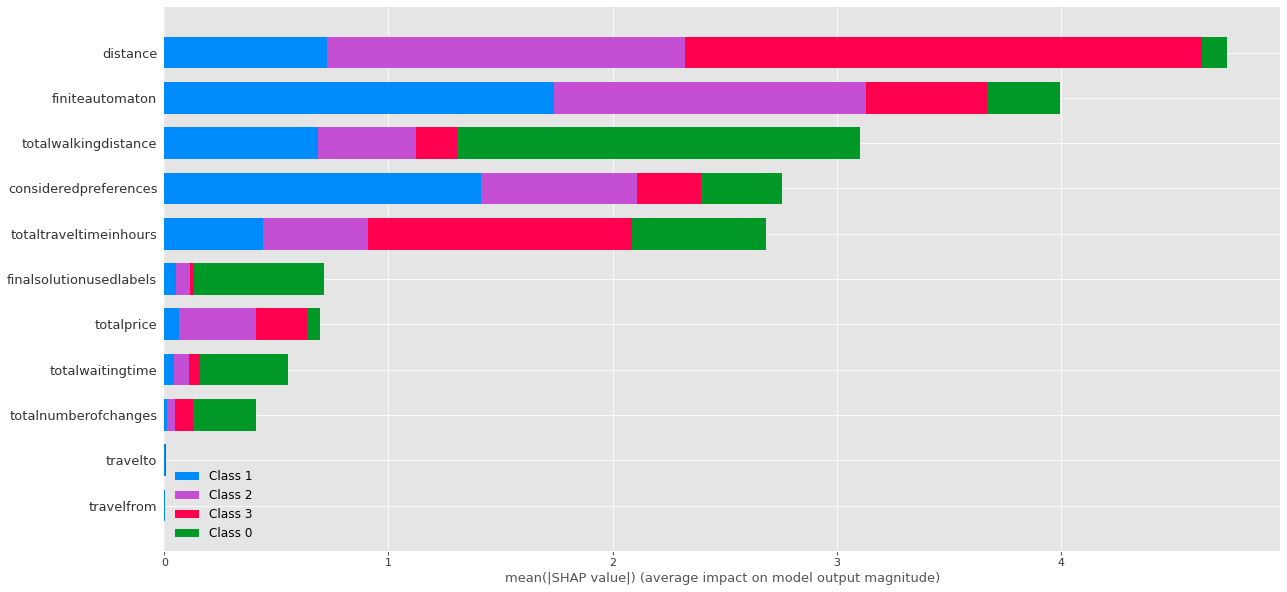

In [ ]:
#plot the columns importance
shap.summary_plot(shap_values_kk, categ_data, plot_type="bar", plot_size=(20, 10))

Shap is a game theoretic approach to explain outcome of the ML models,distance was significant to push outcomes in 4th cluster (3d index) where we have the lowest distance as well as 3d cluster with the highest

finiteautomaton was significant to assign the values to groups for 2d cluster-we have noFlights as the prevail mode there

walkingdistance influenced on 1st cluster with the highest ratio of walking distance

traveltimeinhours contributed in 4th cluster (fastest transportation)

consideredpreferences column pushed to the second cluster with the low walking distance

first 5 columns were really meaningfull for clustering the dataset

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


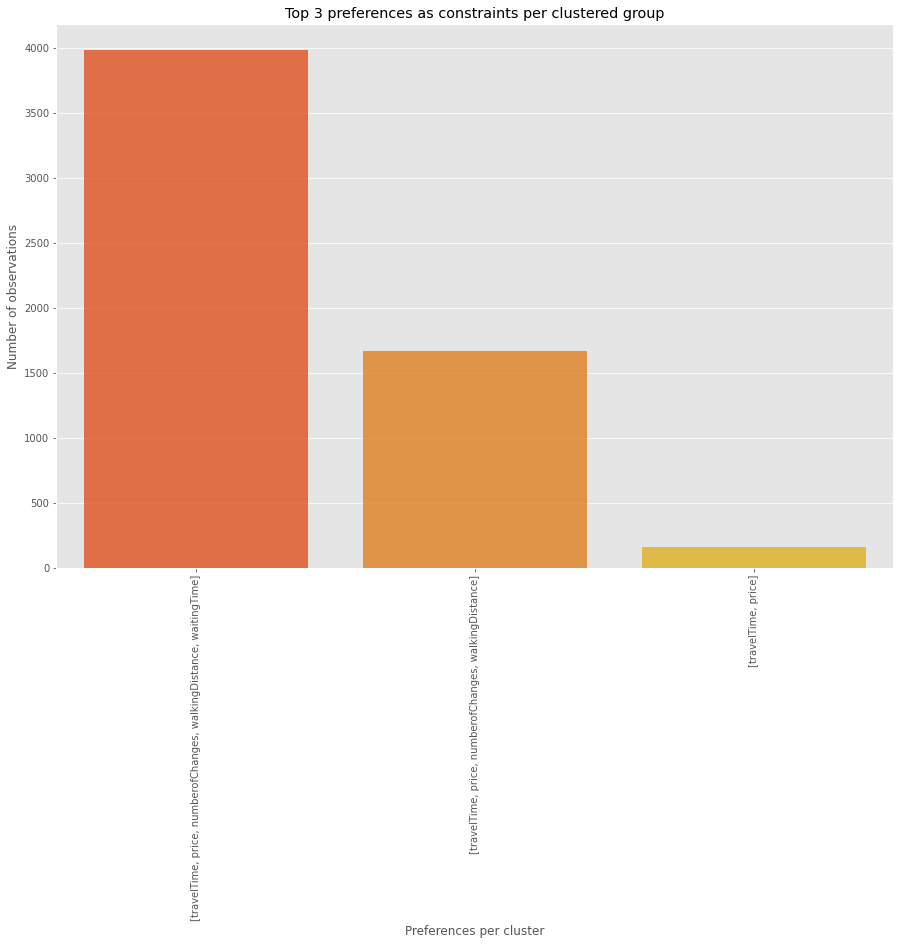

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


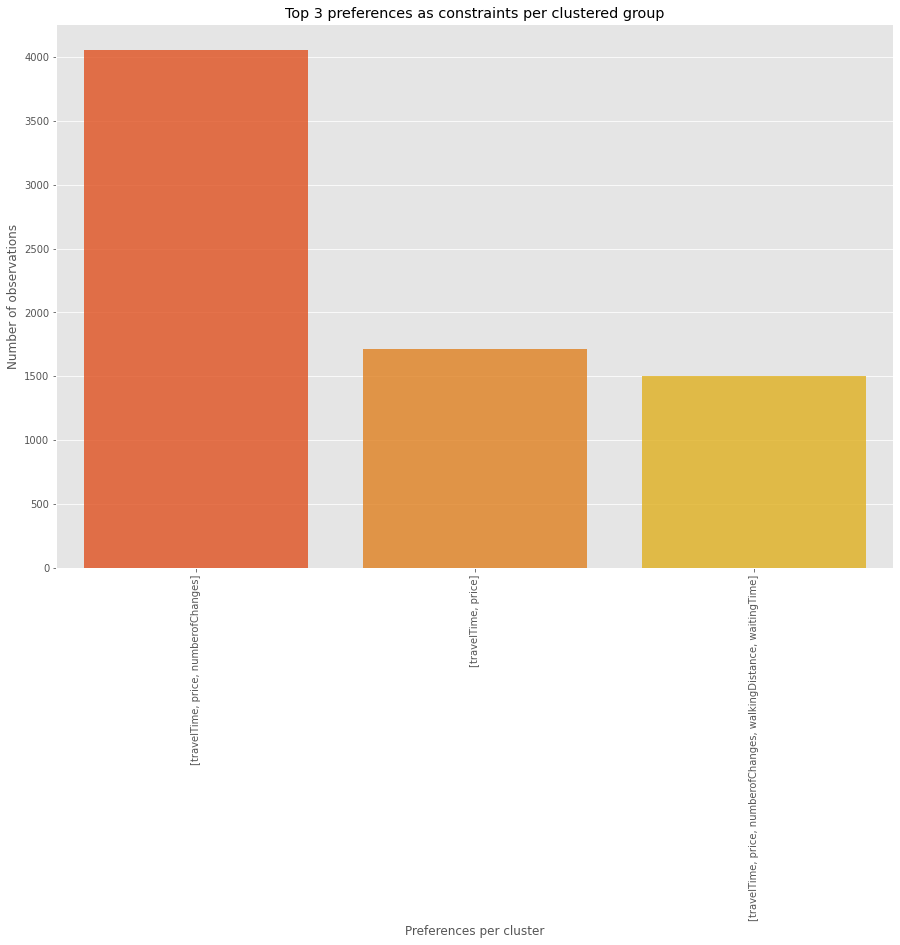

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


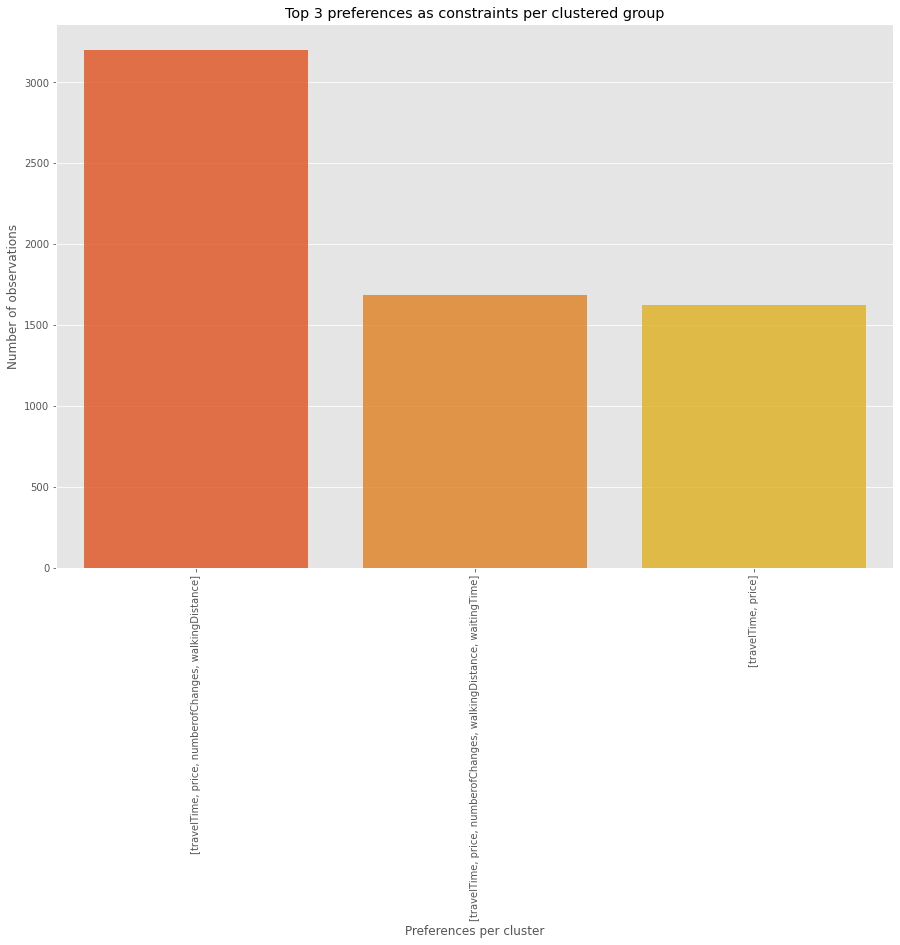

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


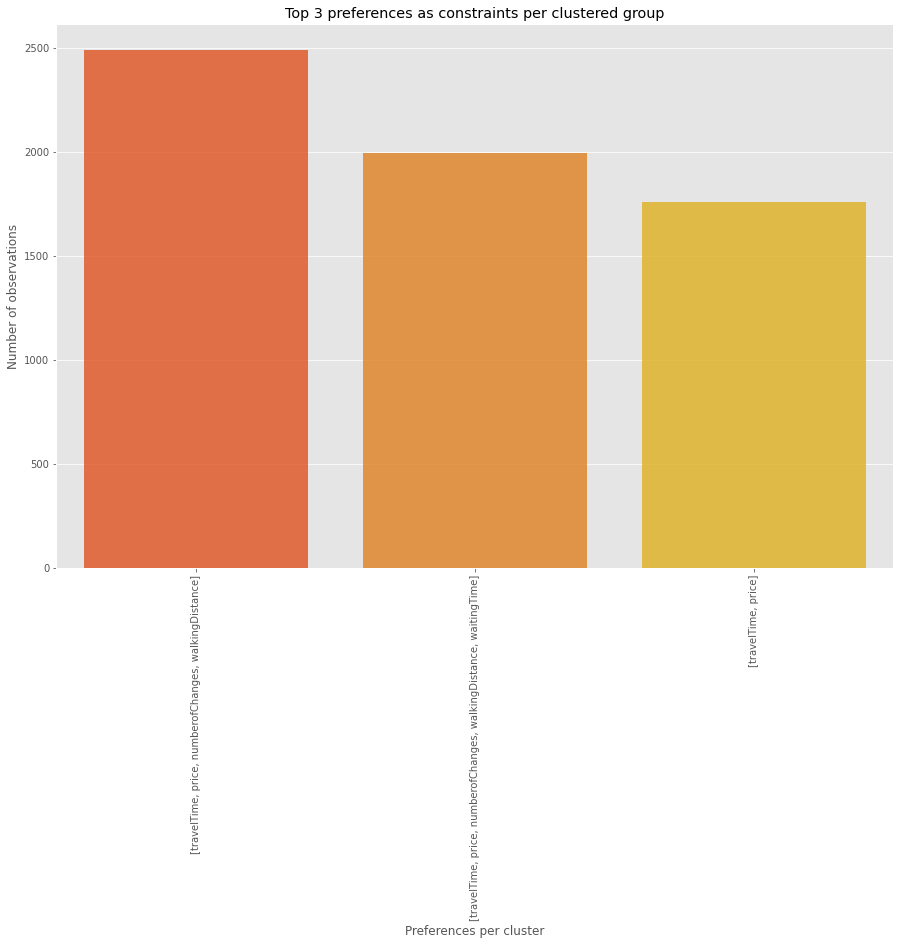

In [ ]:
def plot7(data):
# invetsigate considered preferences
  cnt_srs = data['consideredpreferences'].value_counts().nlargest(3)#top 3
  plt.figure(figsize=(15,10))
  sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="autumn")
  plt.title('Top 3 preferences as constraints per clustered group')
  plt.xticks(rotation='vertical')
  plt.xlabel('Preferences per cluster', fontsize=12)
  plt.ylabel('Number of observations', fontsize=12)
  plt.show()

plot7(cluster_1)
plot7(cluster_2)
plot7(cluster_3)
plot7(cluster_4)

Checked the 2d cluster and considered preferences

2d group 1st and 2d place-less preferences-less constraints in comparison to other groups